# Libraries

In [1]:
# !'/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/bin/python' -m pip install tensorflow
# !'/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/bin/python' -m pip install matplotlib
# !'/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/bin/python' -m pip install scikit-learn



In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from tensorflow.keras import layers, models
from keras import Sequential
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout


from Functions1 import load_and_filter_images, split_dataset
from Functions1 import load_and_preprocess_data, build_and_compile_model, train_model, evaluate_model
from plots import plot_confusion_matrix, plot_training_history, plot_training_history2


path_dir = os.getcwd()
np.random.seed(123)
tf.random.set_seed(123)

2024-09-11 21:36:58.971365: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-11 21:37:00.411544: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-11 21:37:00.411617: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-11 21:37:00.412758: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-11 21:37:01.017076: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-11 21:37:01.018196: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

# Selected Images

In [5]:
dataset_dir_org = f'{path_dir}/Imbalanced_Data/Selected_Images/Original_selected'
dataset_dir_ddpm = f'{path_dir}/Imbalanced_Data/Selected_Images/DDPM'
dataset_dir_pggans150 = f'{path_dir}/Imbalanced_Data/Selected_Images/PGGANS150'
dataset_dir_pggans160 = f'{path_dir}/Imbalanced_Data/Selected_Images/PGGANS160'
test_dataset_dir = f'{path_dir}/Imbalanced_Data/Selected_Images/Test_selected_imbalanced'
test_dataset_dir1 = f'{path_dir}/Imbalanced_Data/Selected_Images/Test/dataset_1'
test_dataset_dir2 = f'{path_dir}/Imbalanced_Data/Selected_Images/Test/dataset_2'
test_dataset_dir3 = f'{path_dir}/Imbalanced_Data/Selected_Images/Test/dataset_3'

class_labels = sorted(os.listdir(dataset_dir_org))
batch_size = 32
img_size = (224, 224)
input_shape = (224, 224, 3)
epochs = 20
n = 5    # number of runs

## CNN 

In [3]:
dataset_dir_org = f'{path_dir}/Imbalanced_Data/Selected_Images/Original_selected'
dataset_dir_ddpm = f'{path_dir}/Imbalanced_Data/Selected_Images/DDPM'
dataset_dir_pggans150 = f'{path_dir}/Imbalanced_Data/Selected_Images/PGGANS150'
dataset_dir_pggans160 = f'{path_dir}/Imbalanced_Data/Selected_Images/PGGANS160'
test_dataset_dir = f'{path_dir}/Imbalanced_Data/Selected_Images/Test_selected_imbalanced'
test_dataset_dir1 = f'{path_dir}/Imbalanced_Data/Selected_Images/Test/dataset_1'
test_dataset_dir2 = f'{path_dir}/Imbalanced_Data/Selected_Images/Test/dataset_2'
test_dataset_dir3 = f'{path_dir}/Imbalanced_Data/Selected_Images/Test/dataset_3'

### Train: Original Data

2024-09-09 18:09:33.190148: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/20
43/43 [==============================] - 53s 1s/step - loss: 1.4901 - accuracy: 0.9021 - val_loss: 1.6643 - val_accuracy: 0.8656
Epoch 2/20
43/43 [==============================] - 50s 1s/step - loss: 1.0549 - accuracy: 0.9407 - val_loss: 2.1610 - val_accuracy: 0.9062
Epoch 3/20
43/43 [==============================] - 50s 1s/step - loss: 1.0121 - accuracy: 0.9444 - val_loss: 0.7747 - val_accuracy: 0.9688
Epoch 4/20
43/43 [==============================] - 51s 1s/step - loss: 0.8421 - accuracy: 0.9615 - val_loss: 0.6510 - val_accuracy: 0.9906
Epoch 5/20
43/43 [==============================] - 50s 1s/step - loss: 0.7866 - accuracy: 0.9718 - val_loss: 0.7084 - val_accuracy: 0.9719
Epoch 6/20
43/43 [==============================] - 51s 1s/step - loss: 0.7024 - accuracy: 0.9760 - val_loss: 0.6381 - val_accuracy: 0.9875
Epoch 7/20
43/43 [==============================] - 50s 1s/step - loss: 0.6483 - accuracy: 0.9844 - val_loss: 0.5872 - val_accuracy: 0.9937
Epoch 8/20
43/43 [==

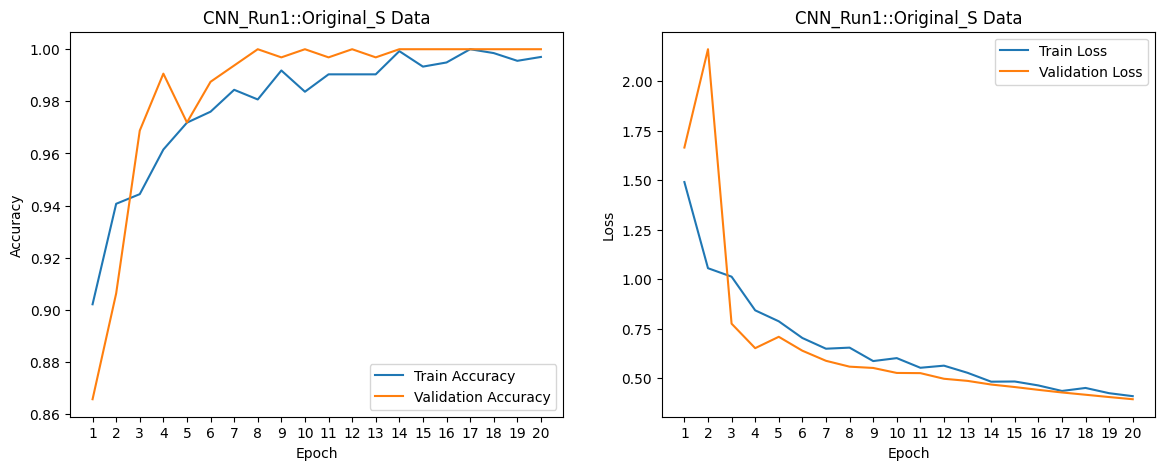

Confusion matrix, without normalization
[[228   3]
 [  9  66]]
              precision    recall  f1-score   support

      NORMAL       0.96      0.99      0.97       231
   PNEUMONIA       0.96      0.88      0.92        75

    accuracy                           0.96       306
   macro avg       0.96      0.93      0.95       306
weighted avg       0.96      0.96      0.96       306

Confusion matrix, without normalization
[[225   4]
 [  8  69]]
              precision    recall  f1-score   support

      NORMAL       0.97      0.98      0.97       229
   PNEUMONIA       0.95      0.90      0.92        77

    accuracy                           0.96       306
   macro avg       0.96      0.94      0.95       306
weighted avg       0.96      0.96      0.96       306

Confusion matrix, without normalization
[[227   4]
 [ 15  60]]
              precision    recall  f1-score   support

      NORMAL       0.94      0.98      0.96       231
   PNEUMONIA       0.94      0.80      0.86     

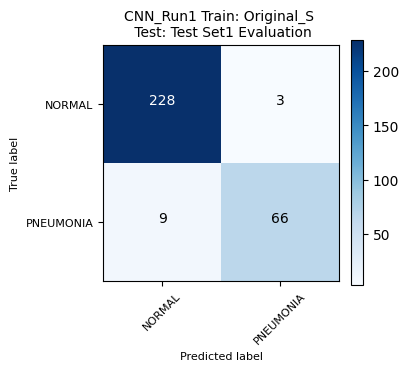

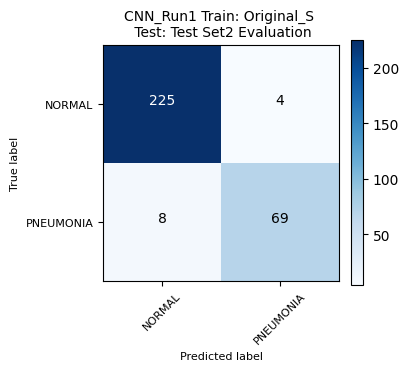

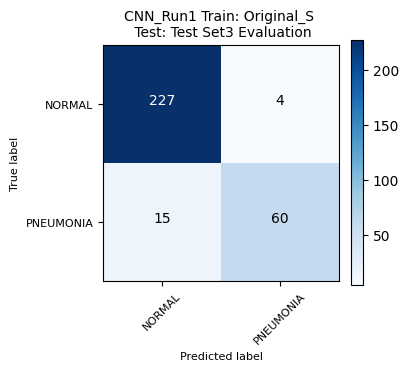

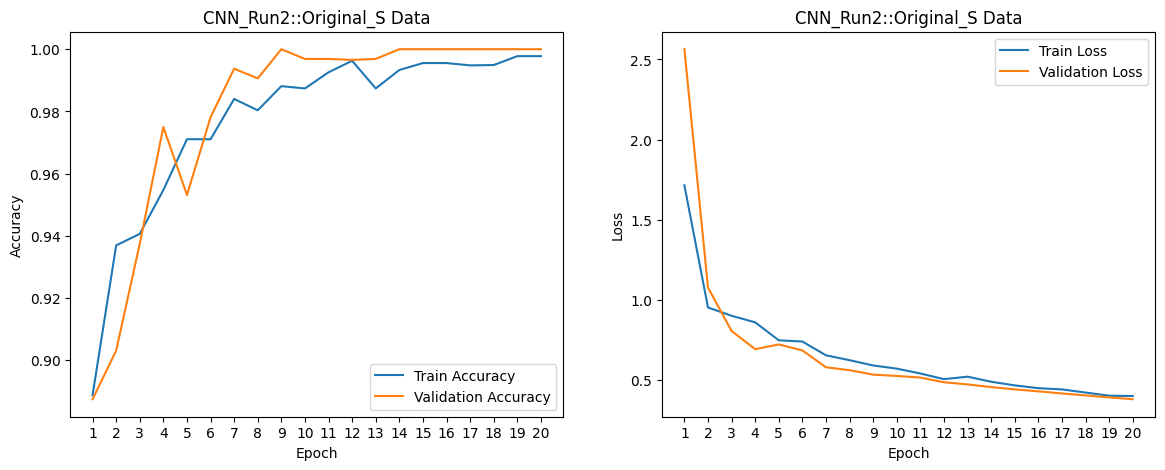

Confusion matrix, without normalization
[[229   1]
 [  9  67]]
              precision    recall  f1-score   support

      NORMAL       0.96      1.00      0.98       230
   PNEUMONIA       0.99      0.88      0.93        76

    accuracy                           0.97       306
   macro avg       0.97      0.94      0.95       306
weighted avg       0.97      0.97      0.97       306

Confusion matrix, without normalization
[[231   3]
 [  5  67]]
              precision    recall  f1-score   support

      NORMAL       0.98      0.99      0.98       234
   PNEUMONIA       0.96      0.93      0.94        72

    accuracy                           0.97       306
   macro avg       0.97      0.96      0.96       306
weighted avg       0.97      0.97      0.97       306

Confusion matrix, without normalization
[[229   1]
 [ 11  65]]
              precision    recall  f1-score   support

      NORMAL       0.95      1.00      0.97       230
   PNEUMONIA       0.98      0.86      0.92     

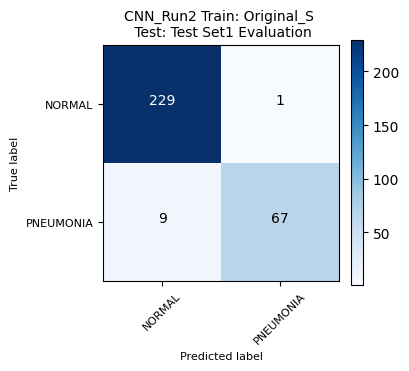

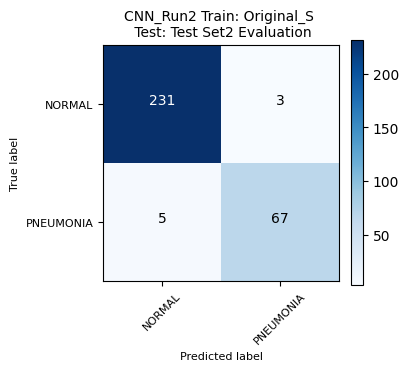

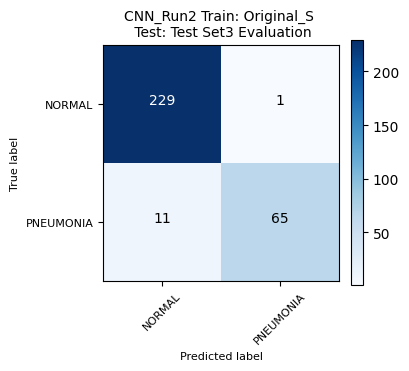

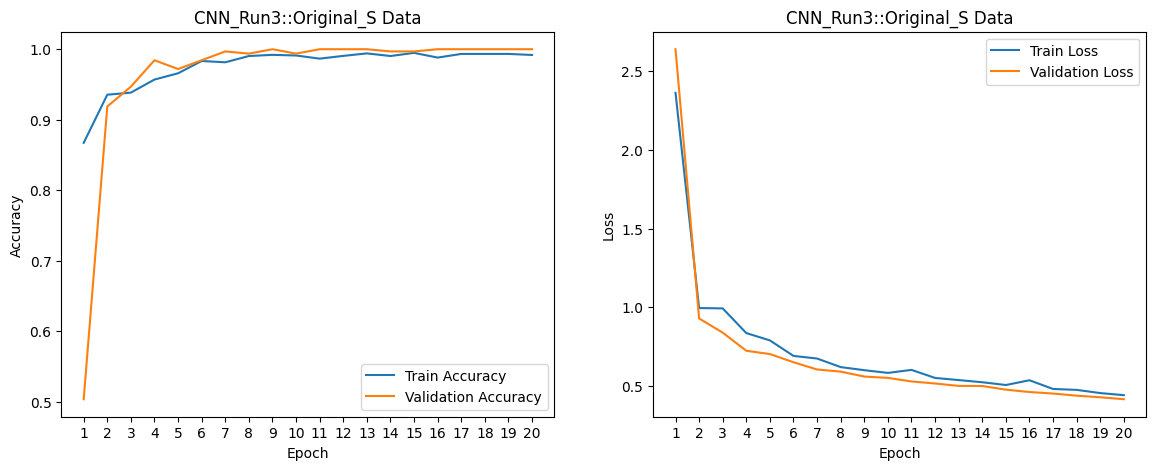

Confusion matrix, without normalization
[[239   2]
 [  9  70]]
              precision    recall  f1-score   support

      NORMAL       0.96      0.99      0.98       241
   PNEUMONIA       0.97      0.89      0.93        79

    accuracy                           0.97       320
   macro avg       0.97      0.94      0.95       320
weighted avg       0.97      0.97      0.97       320

Confusion matrix, without normalization
[[228   3]
 [  9  66]]
              precision    recall  f1-score   support

      NORMAL       0.96      0.99      0.97       231
   PNEUMONIA       0.96      0.88      0.92        75

    accuracy                           0.96       306
   macro avg       0.96      0.93      0.95       306
weighted avg       0.96      0.96      0.96       306

Confusion matrix, without normalization
[[232   1]
 [ 13  60]]
              precision    recall  f1-score   support

      NORMAL       0.95      1.00      0.97       233
   PNEUMONIA       0.98      0.82      0.90     

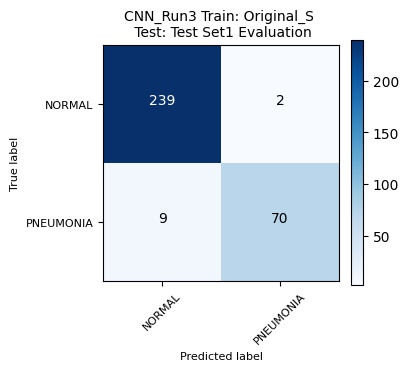

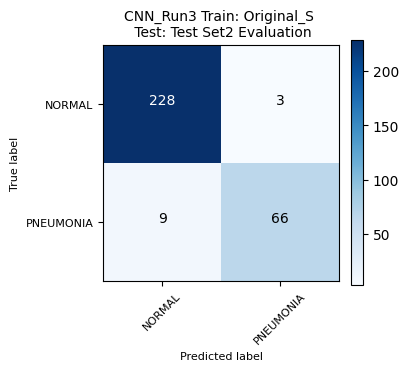

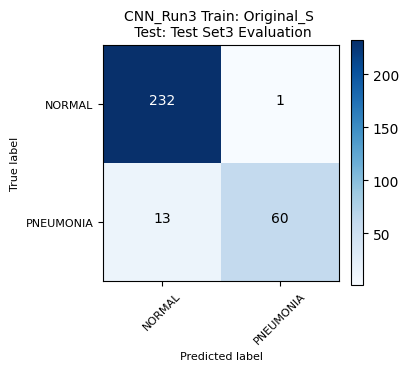

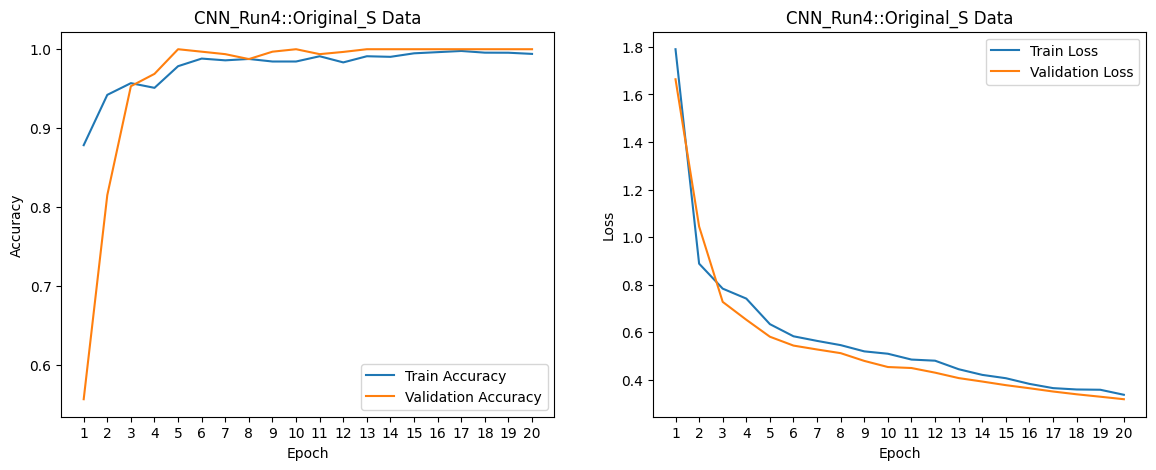

Confusion matrix, without normalization
[[224   3]
 [  7  72]]
              precision    recall  f1-score   support

      NORMAL       0.97      0.99      0.98       227
   PNEUMONIA       0.96      0.91      0.94        79

    accuracy                           0.97       306
   macro avg       0.96      0.95      0.96       306
weighted avg       0.97      0.97      0.97       306

Confusion matrix, without normalization
[[225   4]
 [  7  70]]
              precision    recall  f1-score   support

      NORMAL       0.97      0.98      0.98       229
   PNEUMONIA       0.95      0.91      0.93        77

    accuracy                           0.96       306
   macro avg       0.96      0.95      0.95       306
weighted avg       0.96      0.96      0.96       306

Confusion matrix, without normalization
[[227   4]
 [  7  68]]
              precision    recall  f1-score   support

      NORMAL       0.97      0.98      0.98       231
   PNEUMONIA       0.94      0.91      0.93     

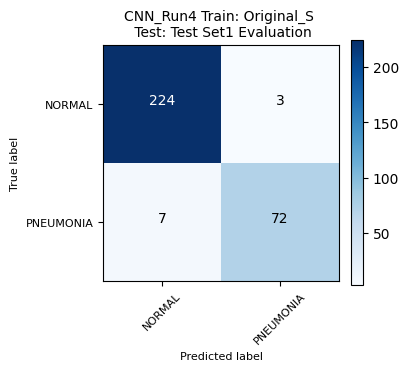

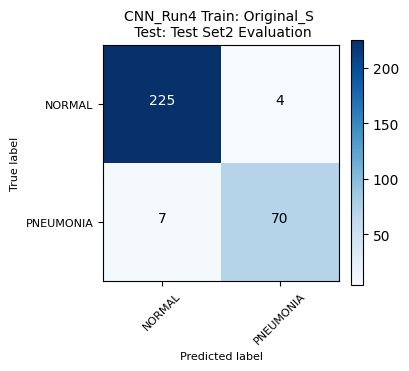

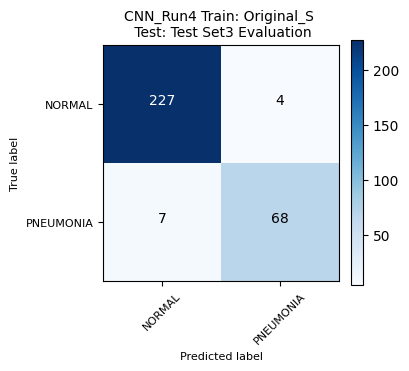

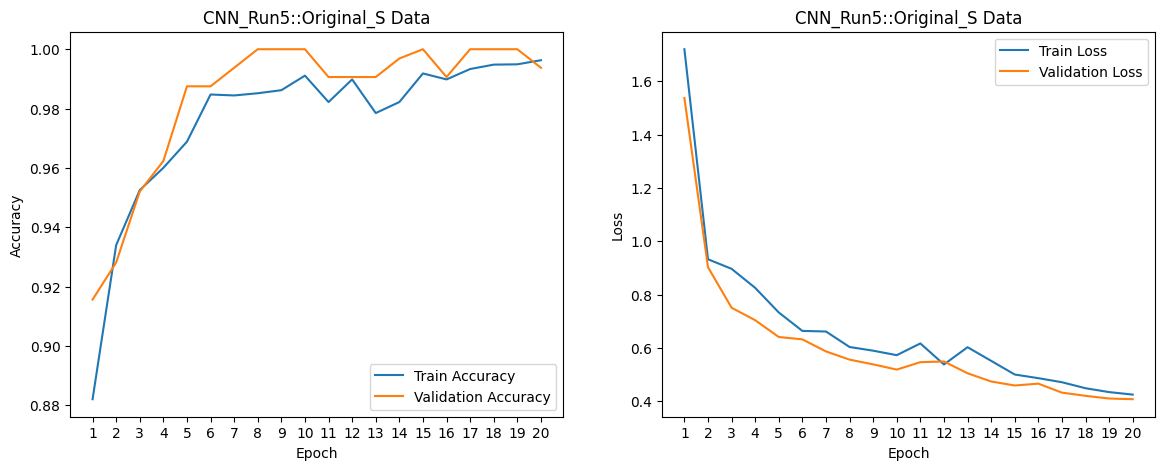

Confusion matrix, without normalization
[[224   3]
 [ 12  67]]
              precision    recall  f1-score   support

      NORMAL       0.95      0.99      0.97       227
   PNEUMONIA       0.96      0.85      0.90        79

    accuracy                           0.95       306
   macro avg       0.95      0.92      0.93       306
weighted avg       0.95      0.95      0.95       306

Confusion matrix, without normalization
[[231   1]
 [  7  67]]
              precision    recall  f1-score   support

      NORMAL       0.97      1.00      0.98       232
   PNEUMONIA       0.99      0.91      0.94        74

    accuracy                           0.97       306
   macro avg       0.98      0.95      0.96       306
weighted avg       0.97      0.97      0.97       306

Confusion matrix, without normalization
[[228   2]
 [ 12  64]]
              precision    recall  f1-score   support

      NORMAL       0.95      0.99      0.97       230
   PNEUMONIA       0.97      0.84      0.90     

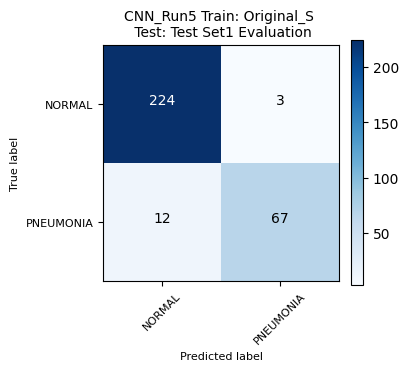

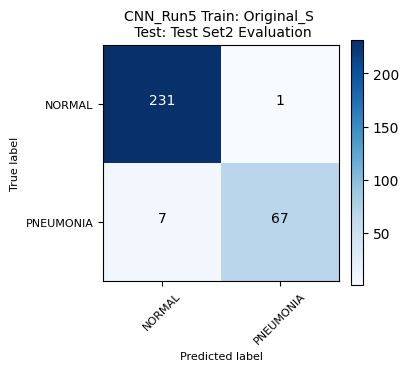

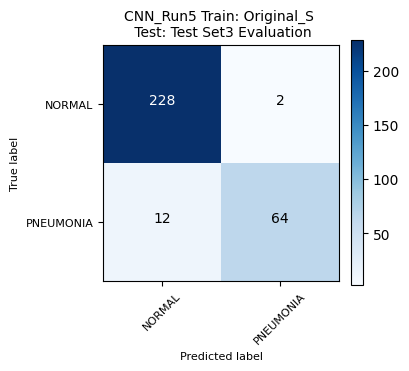

In [4]:
dataset_dir = dataset_dir_org
for i in range(0,n):
    # Load and preprocess datasets
    train_ds, val_ds = load_and_preprocess_data(dataset_dir, class_labels, img_size, batch_size)
    test_ds1 = load_and_preprocess_data(test_dataset_dir1, class_labels, img_size, batch_size)[0]
    test_ds2 = load_and_preprocess_data(test_dataset_dir2, class_labels, img_size, batch_size)[0]
    test_ds3 = load_and_preprocess_data(test_dataset_dir3, class_labels, img_size, batch_size)[0]
    
    model = build_and_compile_model(input_shape=input_shape, num_classes=len(class_labels))
    history, trained_model = train_model(train_ds, val_ds, model, epochs=epochs, batch_size=batch_size)
    
    plot_training_history2(history, "Original_S Data", f"CNN_Run{i+1}", figsize=(14, 5))
    evaluate_model(trained_model, test_ds1, class_labels, model_name=f"CNN_Run{i+1} Train: Original_S", title="Test Set1 Evaluation")
    evaluate_model(trained_model, test_ds2, class_labels, model_name=f"CNN_Run{i+1} Train: Original_S", title="Test Set2 Evaluation")
    evaluate_model(trained_model, test_ds3, class_labels, model_name=f"CNN_Run{i+1} Train: Original_S", title="Test Set3 Evaluation")


### Train: Original & DDPM Data

Epoch 1/20
92/92 [==============================] - 113s 1s/step - loss: 1.5922 - accuracy: 0.9005 - val_loss: 1.3438 - val_accuracy: 0.8343
Epoch 2/20
92/92 [==============================] - 110s 1s/step - loss: 0.9637 - accuracy: 0.9531 - val_loss: 0.7091 - val_accuracy: 0.9742
Epoch 3/20
92/92 [==============================] - 110s 1s/step - loss: 0.7978 - accuracy: 0.9731 - val_loss: 0.6707 - val_accuracy: 0.9823
Epoch 4/20
92/92 [==============================] - 109s 1s/step - loss: 0.7548 - accuracy: 0.9754 - val_loss: 0.5878 - val_accuracy: 0.9946
Epoch 5/20
92/92 [==============================] - 109s 1s/step - loss: 0.6421 - accuracy: 0.9810 - val_loss: 0.5482 - val_accuracy: 0.9973
Epoch 6/20
92/92 [==============================] - 109s 1s/step - loss: 0.6077 - accuracy: 0.9874 - val_loss: 0.5302 - val_accuracy: 0.9946
Epoch 7/20
92/92 [==============================] - 109s 1s/step - loss: 0.5563 - accuracy: 0.9867 - val_loss: 0.4837 - val_accuracy: 1.0000
Epoch 8/20
92

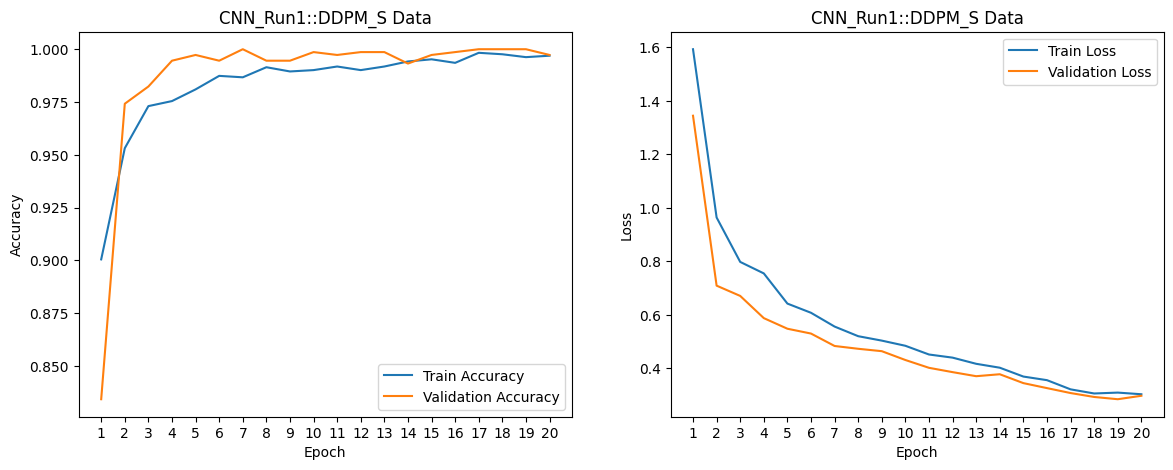

Confusion matrix, without normalization
[[230   5]
 [ 13  58]]
              precision    recall  f1-score   support

      NORMAL       0.95      0.98      0.96       235
   PNEUMONIA       0.92      0.82      0.87        71

    accuracy                           0.94       306
   macro avg       0.93      0.90      0.91       306
weighted avg       0.94      0.94      0.94       306

Confusion matrix, without normalization
[[220   4]
 [ 16  66]]
              precision    recall  f1-score   support

      NORMAL       0.93      0.98      0.96       224
   PNEUMONIA       0.94      0.80      0.87        82

    accuracy                           0.93       306
   macro avg       0.94      0.89      0.91       306
weighted avg       0.94      0.93      0.93       306

Confusion matrix, without normalization
[[225   4]
 [ 20  57]]
              precision    recall  f1-score   support

      NORMAL       0.92      0.98      0.95       229
   PNEUMONIA       0.93      0.74      0.83     

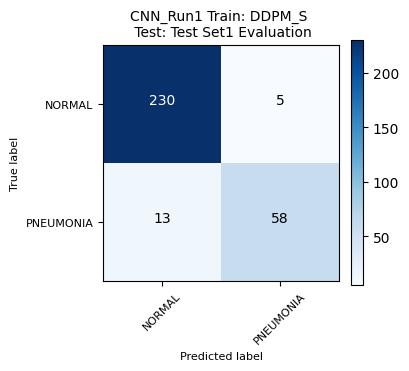

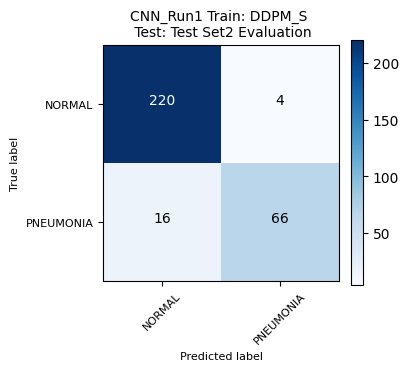

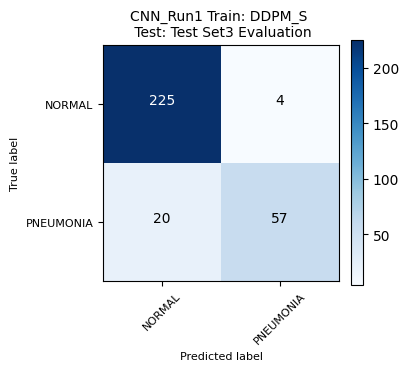

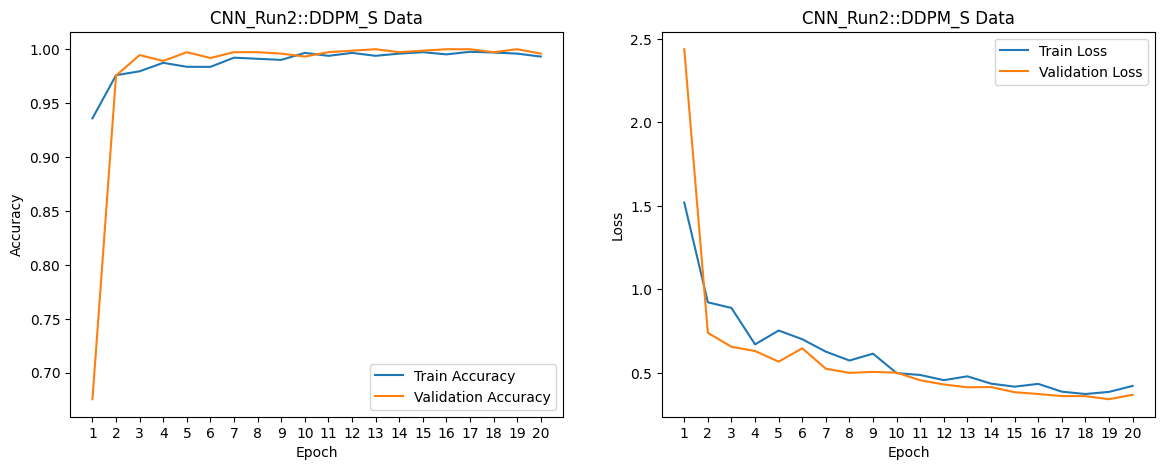

Confusion matrix, without normalization
[[218  10]
 [ 10  68]]
              precision    recall  f1-score   support

      NORMAL       0.96      0.96      0.96       228
   PNEUMONIA       0.87      0.87      0.87        78

    accuracy                           0.93       306
   macro avg       0.91      0.91      0.91       306
weighted avg       0.93      0.93      0.93       306

Confusion matrix, without normalization
[[214  12]
 [  7  73]]
              precision    recall  f1-score   support

      NORMAL       0.97      0.95      0.96       226
   PNEUMONIA       0.86      0.91      0.88        80

    accuracy                           0.94       306
   macro avg       0.91      0.93      0.92       306
weighted avg       0.94      0.94      0.94       306

Confusion matrix, without normalization
[[210  12]
 [ 11  73]]
              precision    recall  f1-score   support

      NORMAL       0.95      0.95      0.95       222
   PNEUMONIA       0.86      0.87      0.86     

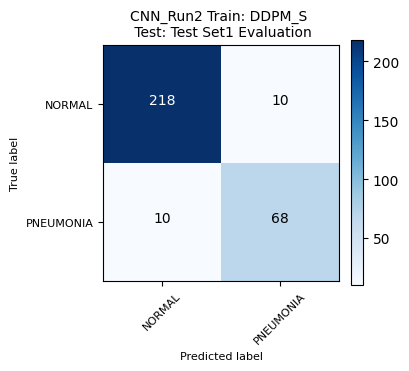

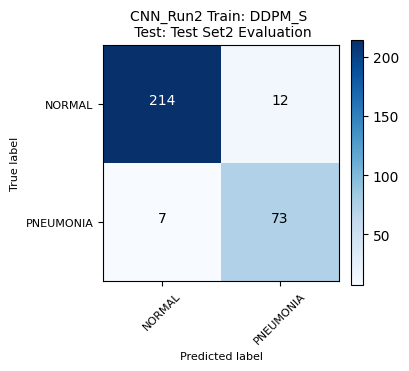

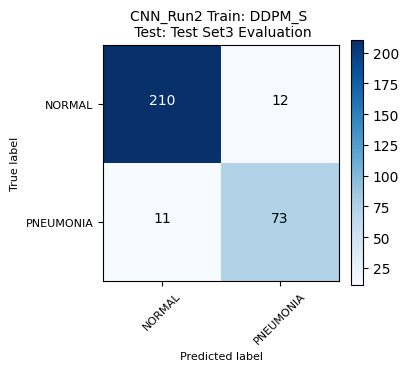

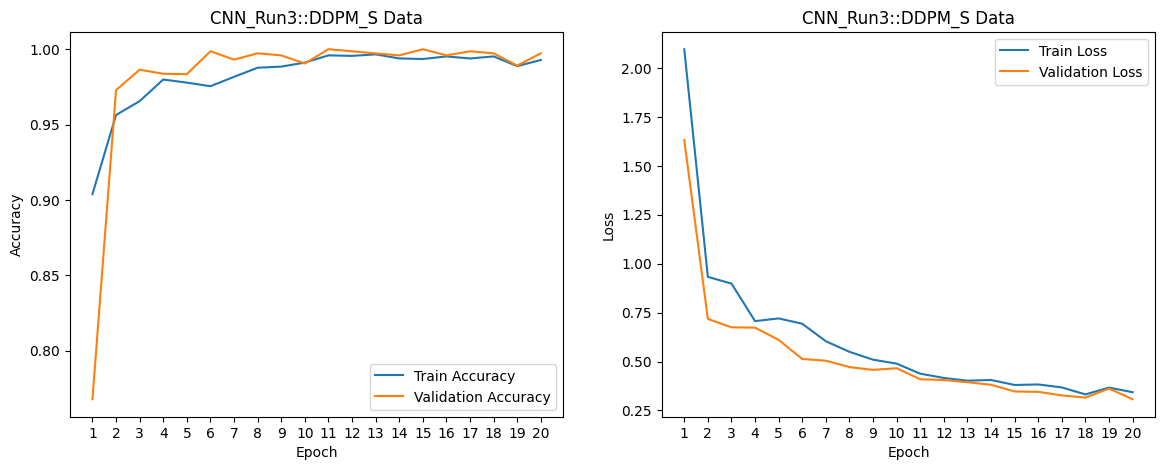

Confusion matrix, without normalization
[[229   2]
 [ 12  63]]
              precision    recall  f1-score   support

      NORMAL       0.95      0.99      0.97       231
   PNEUMONIA       0.97      0.84      0.90        75

    accuracy                           0.95       306
   macro avg       0.96      0.92      0.94       306
weighted avg       0.95      0.95      0.95       306

Confusion matrix, without normalization
[[233   2]
 [ 15  70]]
              precision    recall  f1-score   support

      NORMAL       0.94      0.99      0.96       235
   PNEUMONIA       0.97      0.82      0.89        85

    accuracy                           0.95       320
   macro avg       0.96      0.91      0.93       320
weighted avg       0.95      0.95      0.95       320

Confusion matrix, without normalization
[[228   2]
 [ 15  61]]
              precision    recall  f1-score   support

      NORMAL       0.94      0.99      0.96       230
   PNEUMONIA       0.97      0.80      0.88     

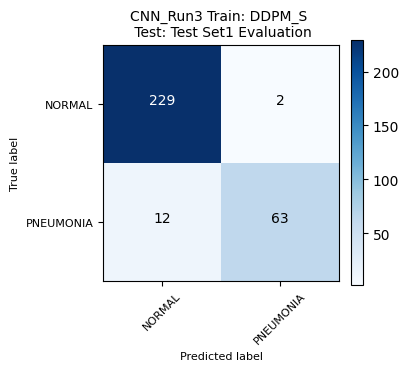

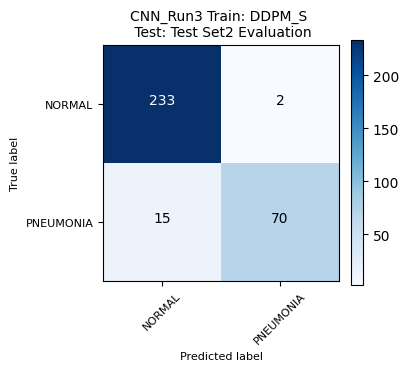

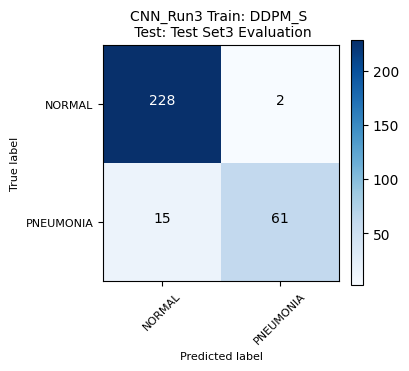

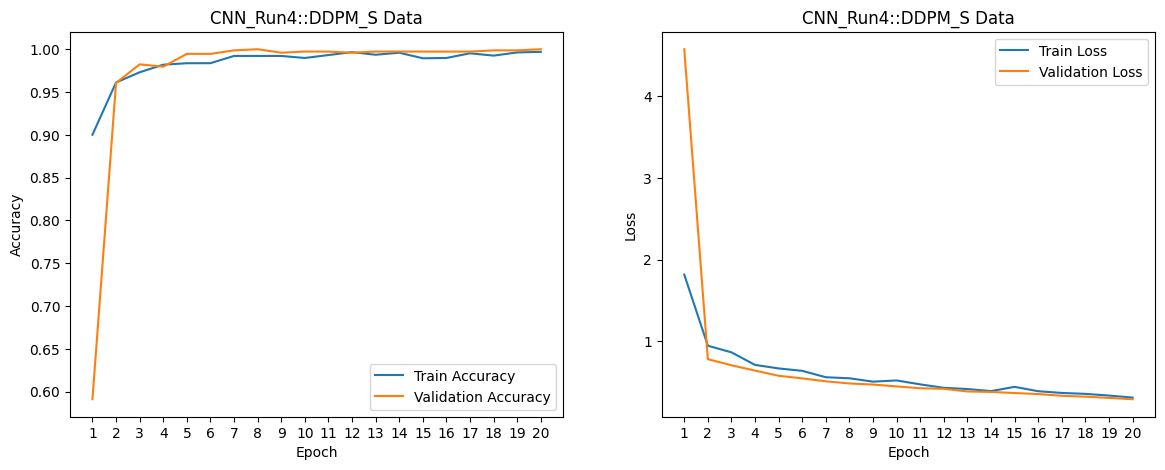

Confusion matrix, without normalization
[[238   3]
 [ 18  61]]
              precision    recall  f1-score   support

      NORMAL       0.93      0.99      0.96       241
   PNEUMONIA       0.95      0.77      0.85        79

    accuracy                           0.93       320
   macro avg       0.94      0.88      0.91       320
weighted avg       0.94      0.93      0.93       320

Confusion matrix, without normalization
[[225   3]
 [ 12  66]]
              precision    recall  f1-score   support

      NORMAL       0.95      0.99      0.97       228
   PNEUMONIA       0.96      0.85      0.90        78

    accuracy                           0.95       306
   macro avg       0.95      0.92      0.93       306
weighted avg       0.95      0.95      0.95       306

Confusion matrix, without normalization
[[229   4]
 [ 17  56]]
              precision    recall  f1-score   support

      NORMAL       0.93      0.98      0.96       233
   PNEUMONIA       0.93      0.77      0.84     

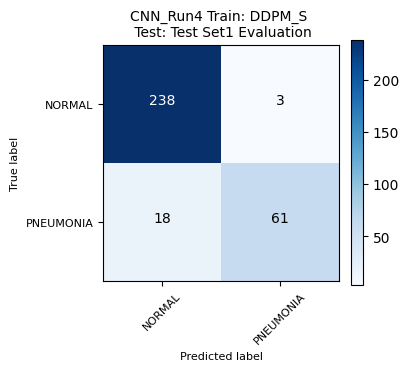

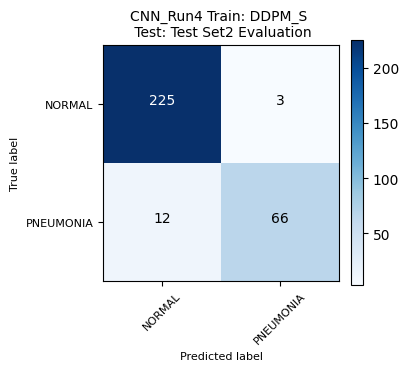

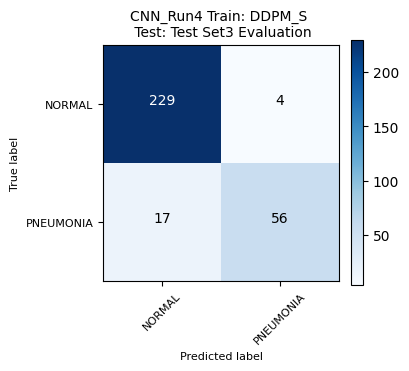

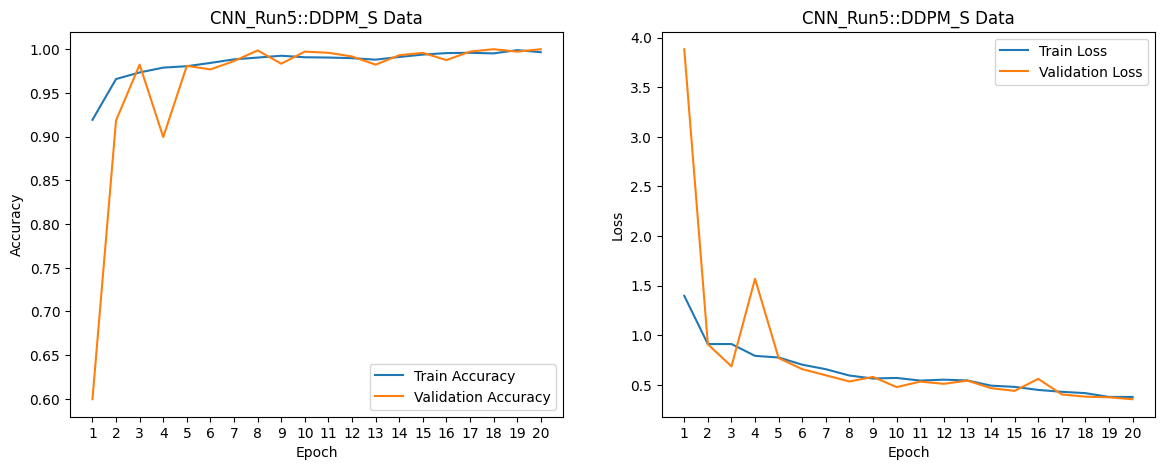

Confusion matrix, without normalization
[[225   4]
 [  7  70]]
              precision    recall  f1-score   support

      NORMAL       0.97      0.98      0.98       229
   PNEUMONIA       0.95      0.91      0.93        77

    accuracy                           0.96       306
   macro avg       0.96      0.95      0.95       306
weighted avg       0.96      0.96      0.96       306

Confusion matrix, without normalization
[[228   2]
 [  8  68]]
              precision    recall  f1-score   support

      NORMAL       0.97      0.99      0.98       230
   PNEUMONIA       0.97      0.89      0.93        76

    accuracy                           0.97       306
   macro avg       0.97      0.94      0.96       306
weighted avg       0.97      0.97      0.97       306

Confusion matrix, without normalization
[[225   4]
 [ 10  67]]
              precision    recall  f1-score   support

      NORMAL       0.96      0.98      0.97       229
   PNEUMONIA       0.94      0.87      0.91     

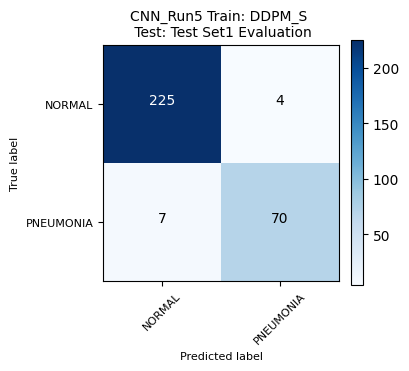

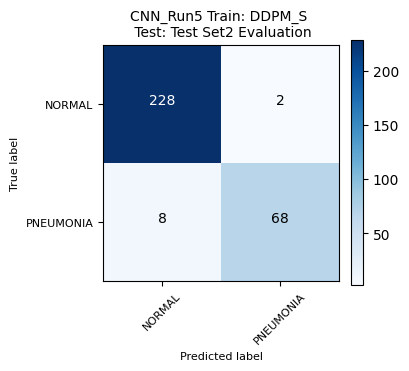

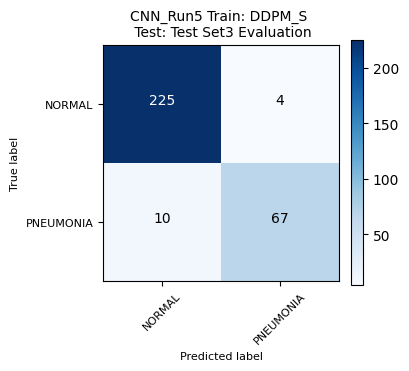

In [5]:
dataset_dir = dataset_dir_ddpm
for i in range(0,n):
    # Load and preprocess datasets
    train_ds, val_ds = load_and_preprocess_data(dataset_dir, class_labels, img_size, batch_size)
    test_ds1 = load_and_preprocess_data(test_dataset_dir1, class_labels, img_size, batch_size)[0]
    test_ds2 = load_and_preprocess_data(test_dataset_dir2, class_labels, img_size, batch_size)[0]
    test_ds3 = load_and_preprocess_data(test_dataset_dir3, class_labels, img_size, batch_size)[0]
    
    model = build_and_compile_model(input_shape=input_shape, num_classes=len(class_labels))
    history, trained_model = train_model(train_ds, val_ds, model, epochs=epochs, batch_size=batch_size)
    
    plot_training_history2(history, "DDPM_S Data", f"CNN_Run{i+1}", figsize=(14, 5))
    evaluate_model(trained_model, test_ds1, class_labels, model_name=f"CNN_Run{i+1} Train: DDPM_S", title="Test Set1 Evaluation")
    evaluate_model(trained_model, test_ds2, class_labels, model_name=f"CNN_Run{i+1} Train: DDPM_S", title="Test Set2 Evaluation")
    evaluate_model(trained_model, test_ds3, class_labels, model_name=f"CNN_Run{i+1} Train: DDPM_S", title="Test Set3 Evaluation")


### Train: Original & PGGANs150k Data

In [ ]:
dataset_dir = dataset_dir_pggans150
for i in range(0,n):
    # Load and preprocess datasets
    train_ds, val_ds = load_and_preprocess_data(dataset_dir, class_labels, img_size, batch_size)
    test_ds1 = load_and_preprocess_data(test_dataset_dir1, class_labels, img_size, batch_size)[0]
    test_ds2 = load_and_preprocess_data(test_dataset_dir2, class_labels, img_size, batch_size)[0]
    test_ds3 = load_and_preprocess_data(test_dataset_dir3, class_labels, img_size, batch_size)[0]
    
    model = build_and_compile_model(input_shape=input_shape, num_classes=len(class_labels))
    history, trained_model = train_model(train_ds, val_ds, model, epochs=epochs, batch_size=batch_size)
    
    plot_training_history2(history, "PGGANs150k_S Data", f"CNN_Run{i+1}", figsize=(14, 5))
    evaluate_model(trained_model, test_ds1, class_labels, model_name=f"CNN_Run{i+1} Train: PGGANs150k_S", title="Test Set1 Evaluation")
    evaluate_model(trained_model, test_ds2, class_labels, model_name=f"CNN_Run{i+1} Train: PGGANs150k_S", title="Test Set2 Evaluation")
    evaluate_model(trained_model, test_ds3, class_labels, model_name=f"CNN_Run{i+1} Train: PGGANs150k_S", title="Test Set3 Evaluation")

### Train: Original & PGGANs160k Data

2024-09-10 09:57:20.546633: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/20
92/92 [==============================] - 136s 1s/step - loss: 1.2482 - accuracy: 0.9318 - val_loss: 1.1064 - val_accuracy: 0.8927
Epoch 2/20
92/92 [==============================] - 136s 1s/step - loss: 0.8458 - accuracy: 0.9683 - val_loss: 0.8450 - val_accuracy: 0.9443
Epoch 3/20
92/92 [==============================] - 131s 1s/step - loss: 0.7080 - accuracy: 0.9847 - val_loss: 0.7205 - val_accuracy: 0.9572
Epoch 4/20
92/92 [==============================] - 136s 1s/step - loss: 0.6591 - accuracy: 0.9864 - val_loss: 0.6499 - val_accuracy: 0.9837
Epoch 5/20
92/92 [==============================] - 133s 1s/step - loss: 0.6033 - accuracy: 0.9928 - val_loss: 0.5720 - val_accuracy: 0.9959
Epoch 6/20
92/92 [==============================] - 137s 1s/step - loss: 0.5973 - accuracy: 0.9905 - val_loss: 0.5472 - val_accuracy: 0.9959
Epoch 7/20
92/92 [==============================] - 135s 1s/step - loss: 0.5485 - accuracy: 0.9942 - val_loss: 0.6101 - val_accuracy: 0.9724
Epoch 8/20
92

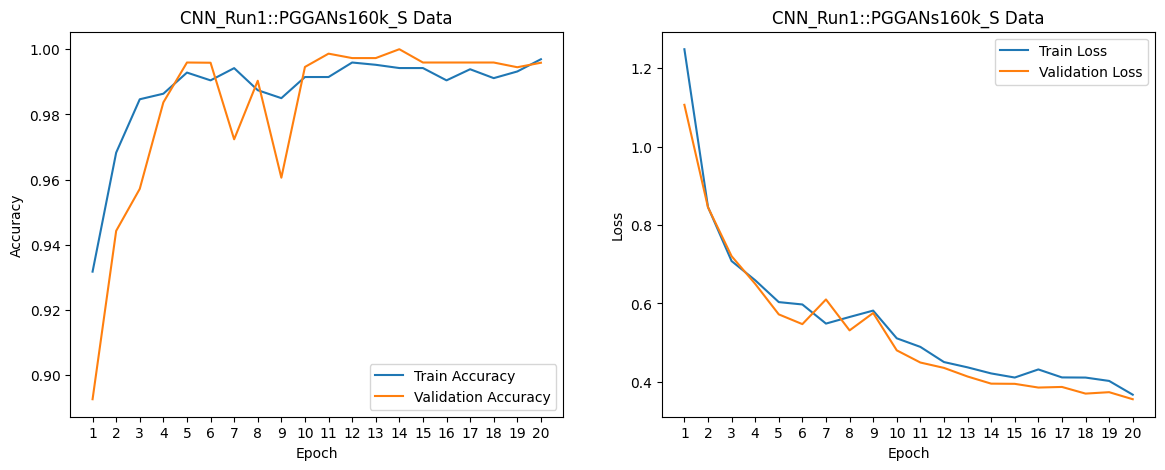

Confusion matrix, without normalization
[[228   3]
 [  5  70]]
              precision    recall  f1-score   support

      NORMAL       0.98      0.99      0.98       231
   PNEUMONIA       0.96      0.93      0.95        75

    accuracy                           0.97       306
   macro avg       0.97      0.96      0.96       306
weighted avg       0.97      0.97      0.97       306

Confusion matrix, without normalization
[[225   4]
 [  5  72]]
              precision    recall  f1-score   support

      NORMAL       0.98      0.98      0.98       229
   PNEUMONIA       0.95      0.94      0.94        77

    accuracy                           0.97       306
   macro avg       0.96      0.96      0.96       306
weighted avg       0.97      0.97      0.97       306

Confusion matrix, without normalization
[[226   5]
 [ 12  63]]
              precision    recall  f1-score   support

      NORMAL       0.95      0.98      0.96       231
   PNEUMONIA       0.93      0.84      0.88     

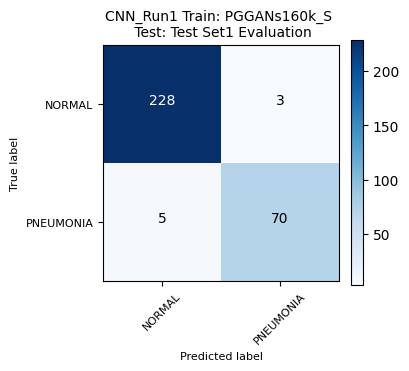

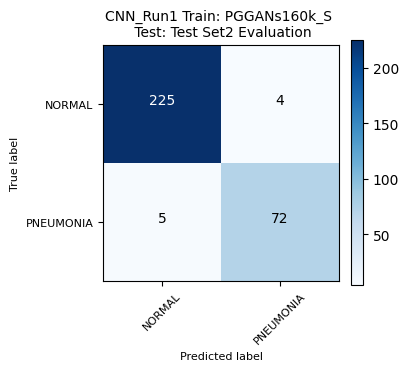

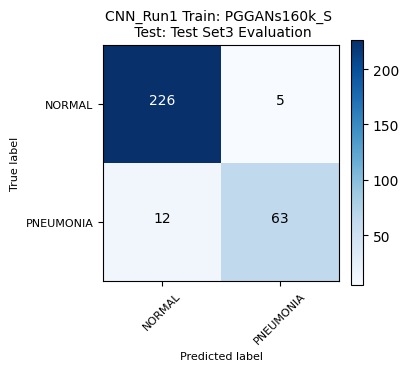

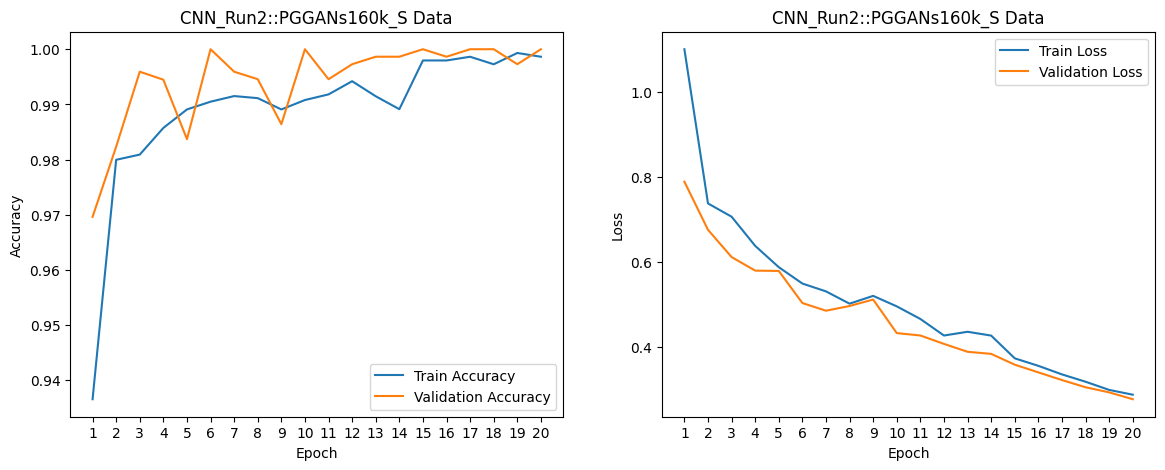

Confusion matrix, without normalization
[[230   0]
 [  6  70]]
              precision    recall  f1-score   support

      NORMAL       0.97      1.00      0.99       230
   PNEUMONIA       1.00      0.92      0.96        76

    accuracy                           0.98       306
   macro avg       0.99      0.96      0.97       306
weighted avg       0.98      0.98      0.98       306

Confusion matrix, without normalization
[[233   1]
 [  3  69]]
              precision    recall  f1-score   support

      NORMAL       0.99      1.00      0.99       234
   PNEUMONIA       0.99      0.96      0.97        72

    accuracy                           0.99       306
   macro avg       0.99      0.98      0.98       306
weighted avg       0.99      0.99      0.99       306

Confusion matrix, without normalization
[[229   1]
 [  8  68]]
              precision    recall  f1-score   support

      NORMAL       0.97      1.00      0.98       230
   PNEUMONIA       0.99      0.89      0.94     

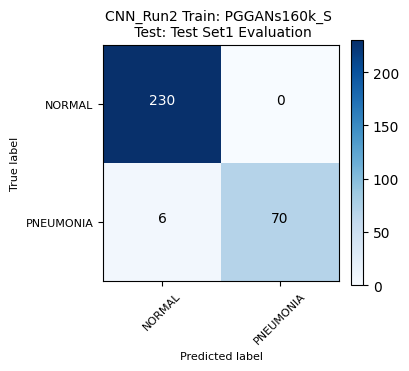

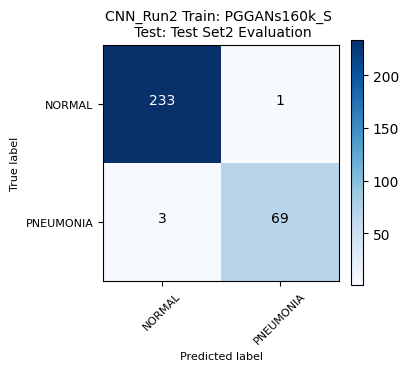

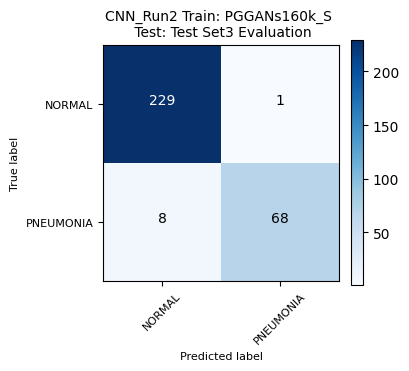

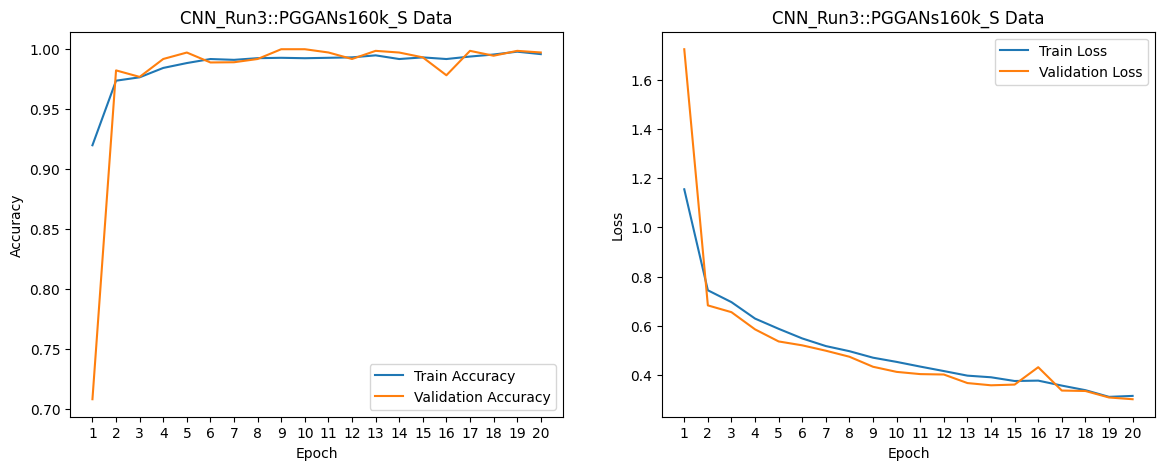

Confusion matrix, without normalization
[[237   4]
 [  9  70]]
              precision    recall  f1-score   support

      NORMAL       0.96      0.98      0.97       241
   PNEUMONIA       0.95      0.89      0.92        79

    accuracy                           0.96       320
   macro avg       0.95      0.93      0.94       320
weighted avg       0.96      0.96      0.96       320

Confusion matrix, without normalization
[[224   7]
 [  5  70]]
              precision    recall  f1-score   support

      NORMAL       0.98      0.97      0.97       231
   PNEUMONIA       0.91      0.93      0.92        75

    accuracy                           0.96       306
   macro avg       0.94      0.95      0.95       306
weighted avg       0.96      0.96      0.96       306

Confusion matrix, without normalization
[[227   6]
 [  9  64]]
              precision    recall  f1-score   support

      NORMAL       0.96      0.97      0.97       233
   PNEUMONIA       0.91      0.88      0.90     

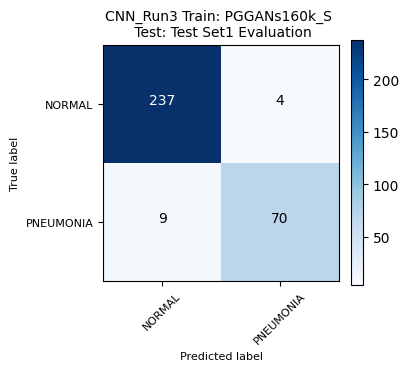

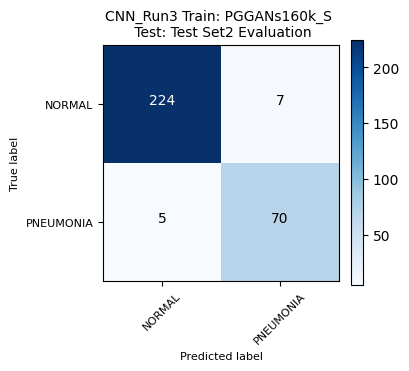

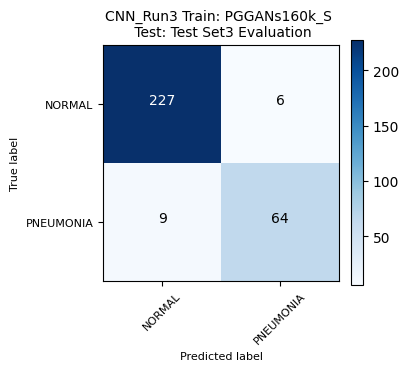

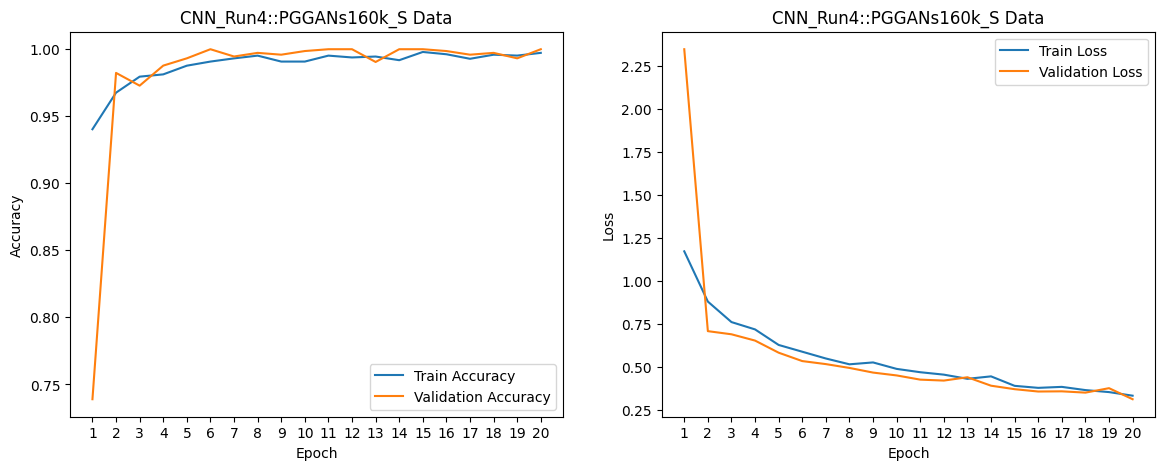

Confusion matrix, without normalization
[[225   2]
 [  7  72]]
              precision    recall  f1-score   support

      NORMAL       0.97      0.99      0.98       227
   PNEUMONIA       0.97      0.91      0.94        79

    accuracy                           0.97       306
   macro avg       0.97      0.95      0.96       306
weighted avg       0.97      0.97      0.97       306

Confusion matrix, without normalization
[[228   1]
 [  8  69]]
              precision    recall  f1-score   support

      NORMAL       0.97      1.00      0.98       229
   PNEUMONIA       0.99      0.90      0.94        77

    accuracy                           0.97       306
   macro avg       0.98      0.95      0.96       306
weighted avg       0.97      0.97      0.97       306

Confusion matrix, without normalization
[[229   2]
 [  7  68]]
              precision    recall  f1-score   support

      NORMAL       0.97      0.99      0.98       231
   PNEUMONIA       0.97      0.91      0.94     

In [ ]:
dataset_dir = dataset_dir_pggans160
for i in range(0,n):
    # Load and preprocess datasets
    train_ds, val_ds = load_and_preprocess_data(dataset_dir, class_labels, img_size, batch_size)
    test_ds1 = load_and_preprocess_data(test_dataset_dir1, class_labels, img_size, batch_size)[0]
    test_ds2 = load_and_preprocess_data(test_dataset_dir2, class_labels, img_size, batch_size)[0]
    test_ds3 = load_and_preprocess_data(test_dataset_dir3, class_labels, img_size, batch_size)[0]
    
    model = build_and_compile_model(input_shape=input_shape, num_classes=len(class_labels))
    history, trained_model = train_model(train_ds, val_ds, model, epochs=epochs, batch_size=batch_size)
    
    plot_training_history2(history, "PGGANs160k_S Data", f"CNN_Run{i+1}", figsize=(14, 5))
    evaluate_model(trained_model, test_ds1, class_labels, model_name=f"CNN_Run{i+1} Train: PGGANs160k_S", title="Test Set1 Evaluation")
    evaluate_model(trained_model, test_ds2, class_labels, model_name=f"CNN_Run{i+1} Train: PGGANs160k_S", title="Test Set2 Evaluation")
    evaluate_model(trained_model, test_ds3, class_labels, model_name=f"CNN_Run{i+1} Train: PGGANs160k_S", title="Test Set3 Evaluation")

# Random Images

In [3]:
dataset_dir_org_rand = f'{path_dir}/Imbalanced_Data/Random_images/Original_Random'
dataset_dir_ddpm_rand = f'{path_dir}/Imbalanced_Data/Random_images/DDPM'
dataset_dir_pggans150_rand = f'{path_dir}/Imbalanced_Data/Random_images/PGGANS150'
dataset_dir_pggans160_rand = f'{path_dir}/Imbalanced_Data/Random_images/PGGANS160'
test_dataset_dir_rand = f'{path_dir}/Imbalanced_Data/Random_images/imbalanced_test'
test_dataset_dir1_rand = f'{path_dir}/Imbalanced_Data/Random_images/Test/dataset_1'
test_dataset_dir2_rand = f'{path_dir}/Imbalanced_Data/Random_images/Test/dataset_2'
test_dataset_dir3_rand = f'{path_dir}/Imbalanced_Data/Random_images/Test/dataset_3'

## CNN Classification

### Train: Originial Data 


2024-09-10 14:00:51.406289: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-09-10 14:00:51.406358: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: o0744.ten.osc.edu
2024-09-10 14:00:51.406378: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: o0744.ten.osc.edu
2024-09-10 14:00:51.406477: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 535.104.5
2024-09-10 14:00:51.406522: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 535.104.5
2024-09-10 14:00:51.406534: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 535.104.5


Epoch 1/20
43/43 [==============================] - 52s 1s/step - loss: 1.4654 - accuracy: 0.9199 - val_loss: 6.2991 - val_accuracy: 0.8406
Epoch 2/20
43/43 [==============================] - 50s 1s/step - loss: 0.8587 - accuracy: 0.9770 - val_loss: 1.0421 - val_accuracy: 0.9281
Epoch 3/20
43/43 [==============================] - 50s 1s/step - loss: 0.8397 - accuracy: 0.9718 - val_loss: 1.2164 - val_accuracy: 0.9156
Epoch 4/20
43/43 [==============================] - 51s 1s/step - loss: 0.7833 - accuracy: 0.9811 - val_loss: 0.7128 - val_accuracy: 0.9812
Epoch 5/20
43/43 [==============================] - 50s 1s/step - loss: 0.6898 - accuracy: 0.9844 - val_loss: 0.6282 - val_accuracy: 0.9937
Epoch 6/20
43/43 [==============================] - 51s 1s/step - loss: 0.6792 - accuracy: 0.9869 - val_loss: 0.5835 - val_accuracy: 1.0000
Epoch 7/20
43/43 [==============================] - 50s 1s/step - loss: 0.6368 - accuracy: 0.9874 - val_loss: 0.5715 - val_accuracy: 1.0000
Epoch 8/20
43/43 [==

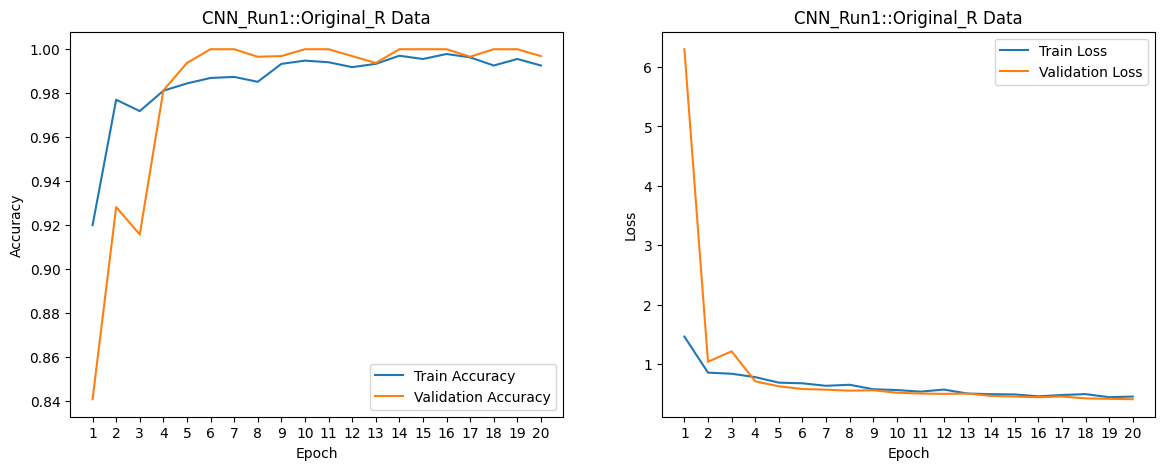

Confusion matrix, without normalization
[[227   4]
 [  7  68]]
              precision    recall  f1-score   support

      NORMAL       0.97      0.98      0.98       231
   PNEUMONIA       0.94      0.91      0.93        75

    accuracy                           0.96       306
   macro avg       0.96      0.94      0.95       306
weighted avg       0.96      0.96      0.96       306

Confusion matrix, without normalization
[[225   4]
 [  8  69]]
              precision    recall  f1-score   support

      NORMAL       0.97      0.98      0.97       229
   PNEUMONIA       0.95      0.90      0.92        77

    accuracy                           0.96       306
   macro avg       0.96      0.94      0.95       306
weighted avg       0.96      0.96      0.96       306

Confusion matrix, without normalization
[[226   5]
 [  2  73]]
              precision    recall  f1-score   support

      NORMAL       0.99      0.98      0.98       231
   PNEUMONIA       0.94      0.97      0.95     

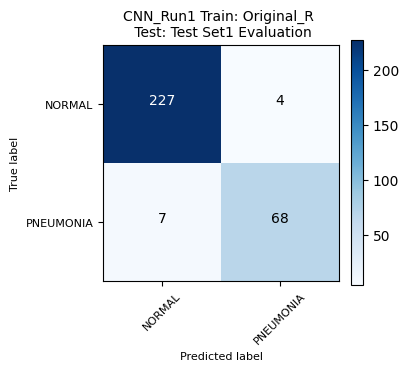

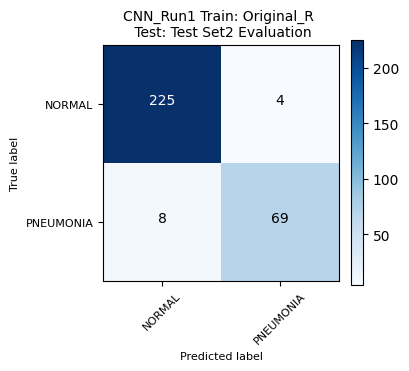

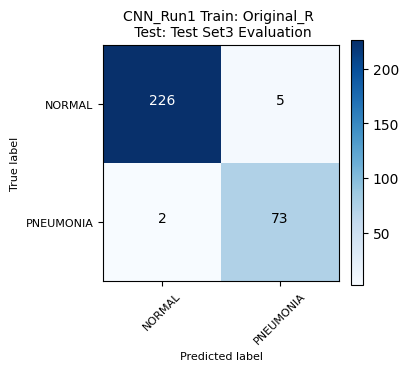

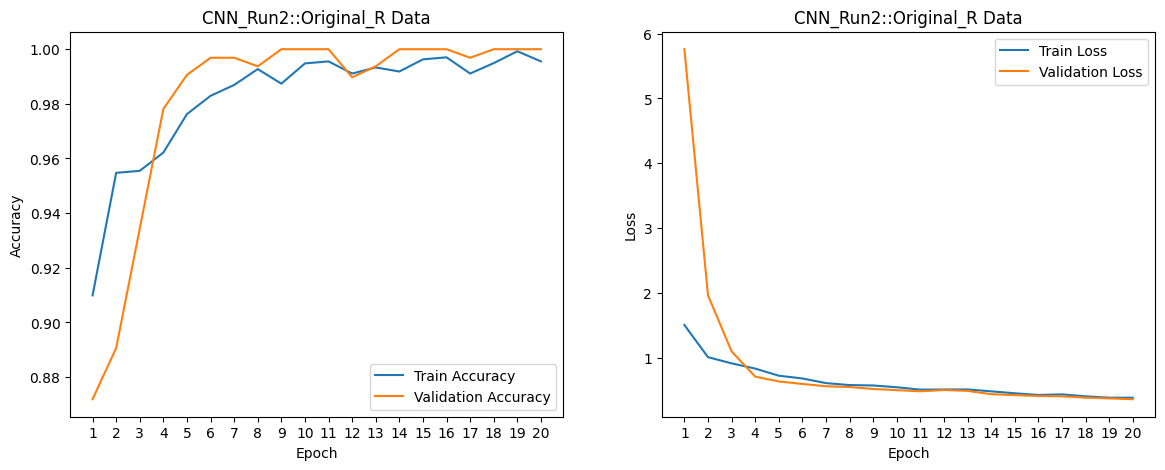

Confusion matrix, without normalization
[[230   0]
 [ 10  66]]
              precision    recall  f1-score   support

      NORMAL       0.96      1.00      0.98       230
   PNEUMONIA       1.00      0.87      0.93        76

    accuracy                           0.97       306
   macro avg       0.98      0.93      0.95       306
weighted avg       0.97      0.97      0.97       306

Confusion matrix, without normalization
[[233   1]
 [ 15  57]]
              precision    recall  f1-score   support

      NORMAL       0.94      1.00      0.97       234
   PNEUMONIA       0.98      0.79      0.88        72

    accuracy                           0.95       306
   macro avg       0.96      0.89      0.92       306
weighted avg       0.95      0.95      0.95       306

Confusion matrix, without normalization
[[228   2]
 [ 10  66]]
              precision    recall  f1-score   support

      NORMAL       0.96      0.99      0.97       230
   PNEUMONIA       0.97      0.87      0.92     

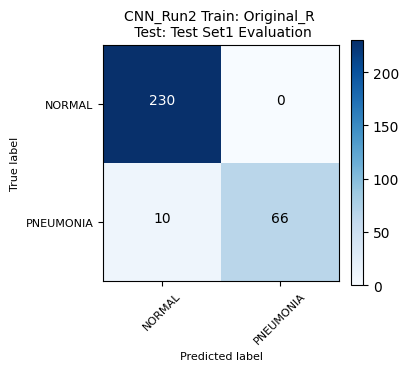

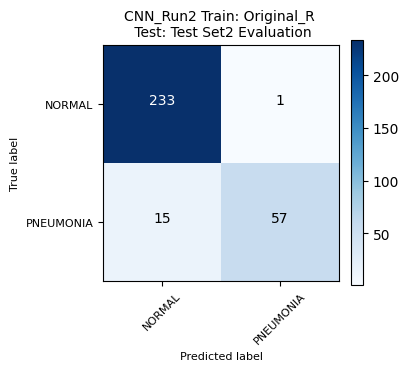

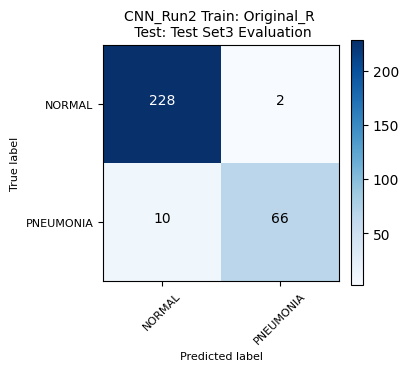

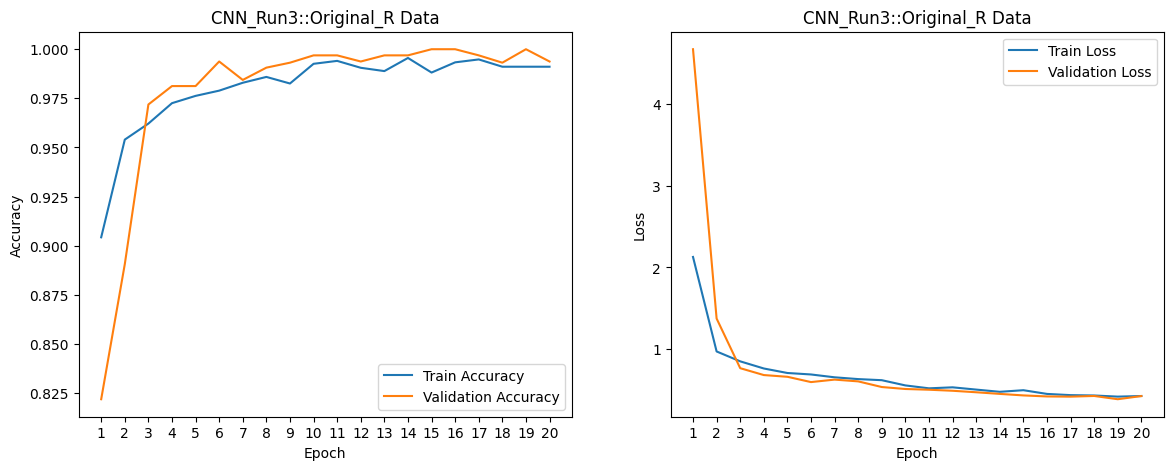

Confusion matrix, without normalization
[[241   0]
 [ 18  61]]
              precision    recall  f1-score   support

      NORMAL       0.93      1.00      0.96       241
   PNEUMONIA       1.00      0.77      0.87        79

    accuracy                           0.94       320
   macro avg       0.97      0.89      0.92       320
weighted avg       0.95      0.94      0.94       320

Confusion matrix, without normalization
[[230   1]
 [ 23  52]]
              precision    recall  f1-score   support

      NORMAL       0.91      1.00      0.95       231
   PNEUMONIA       0.98      0.69      0.81        75

    accuracy                           0.92       306
   macro avg       0.95      0.84      0.88       306
weighted avg       0.93      0.92      0.92       306

Confusion matrix, without normalization
[[232   1]
 [ 20  53]]
              precision    recall  f1-score   support

      NORMAL       0.92      1.00      0.96       233
   PNEUMONIA       0.98      0.73      0.83     

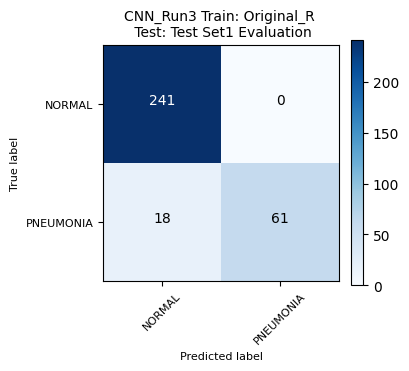

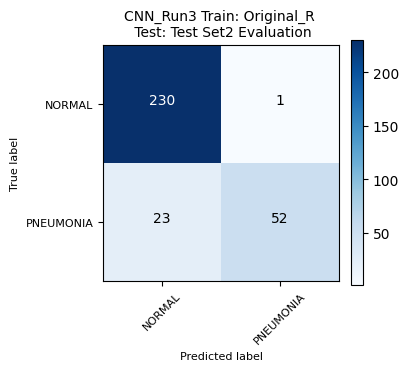

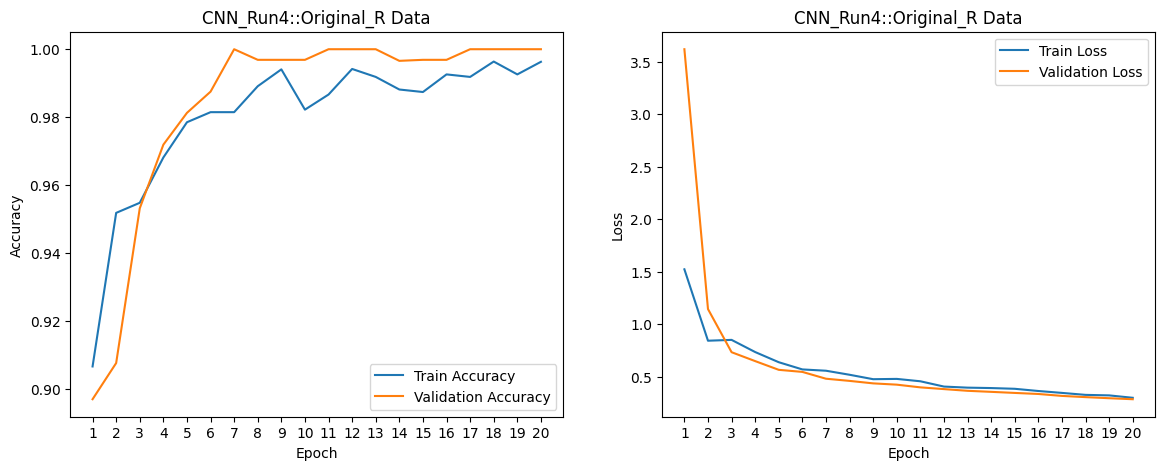

Confusion matrix, without normalization
[[224   3]
 [ 11  68]]
              precision    recall  f1-score   support

      NORMAL       0.95      0.99      0.97       227
   PNEUMONIA       0.96      0.86      0.91        79

    accuracy                           0.95       306
   macro avg       0.96      0.92      0.94       306
weighted avg       0.95      0.95      0.95       306

Confusion matrix, without normalization
[[226   3]
 [ 10  67]]
              precision    recall  f1-score   support

      NORMAL       0.96      0.99      0.97       229
   PNEUMONIA       0.96      0.87      0.91        77

    accuracy                           0.96       306
   macro avg       0.96      0.93      0.94       306
weighted avg       0.96      0.96      0.96       306

Confusion matrix, without normalization
[[228   3]
 [ 10  65]]
              precision    recall  f1-score   support

      NORMAL       0.96      0.99      0.97       231
   PNEUMONIA       0.96      0.87      0.91     

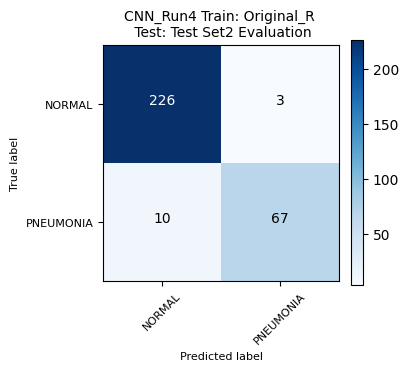

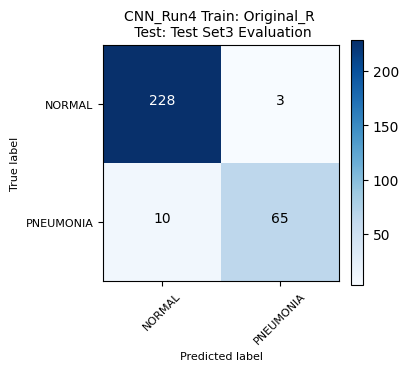

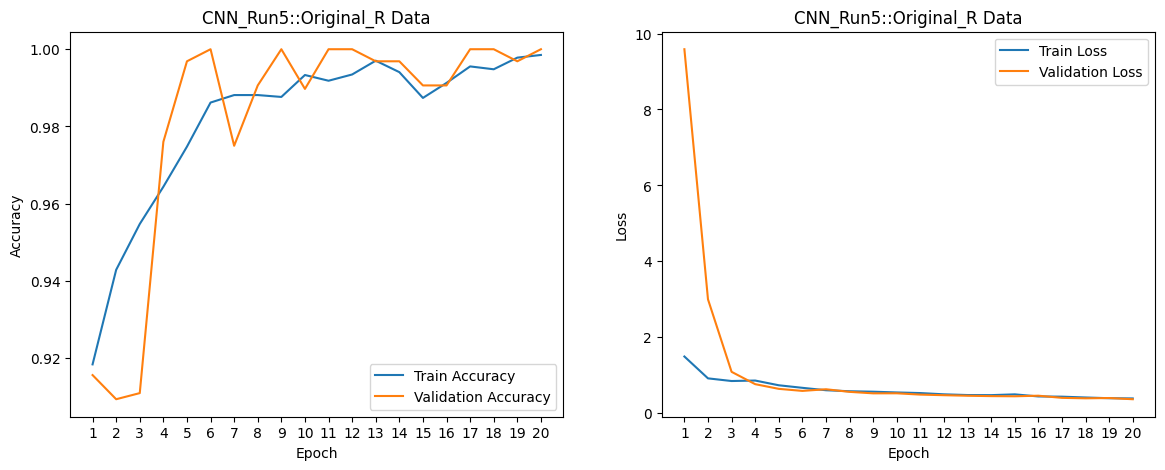

Confusion matrix, without normalization
[[224   3]
 [  8  71]]
              precision    recall  f1-score   support

      NORMAL       0.97      0.99      0.98       227
   PNEUMONIA       0.96      0.90      0.93        79

    accuracy                           0.96       306
   macro avg       0.96      0.94      0.95       306
weighted avg       0.96      0.96      0.96       306

Confusion matrix, without normalization
[[230   2]
 [  9  65]]
              precision    recall  f1-score   support

      NORMAL       0.96      0.99      0.98       232
   PNEUMONIA       0.97      0.88      0.92        74

    accuracy                           0.96       306
   macro avg       0.97      0.93      0.95       306
weighted avg       0.96      0.96      0.96       306

Confusion matrix, without normalization
[[228   2]
 [  6  70]]
              precision    recall  f1-score   support

      NORMAL       0.97      0.99      0.98       230
   PNEUMONIA       0.97      0.92      0.95     

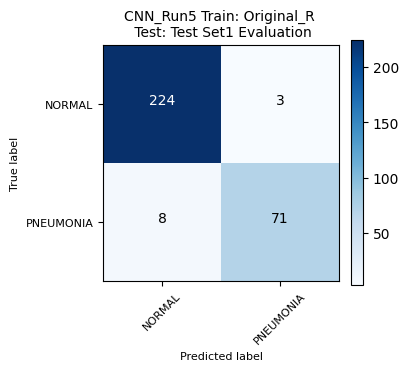

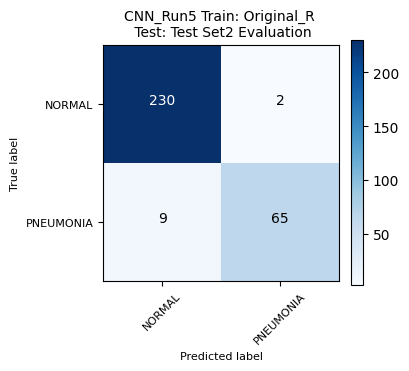

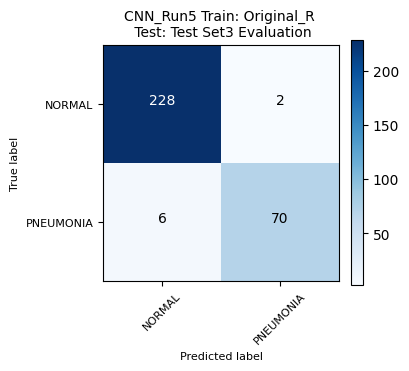

In [5]:
dataset_dir = dataset_dir_org_rand
for i in range(0,n):
    # Load and preprocess datasets
    train_ds, val_ds = load_and_preprocess_data(dataset_dir, class_labels, img_size, batch_size)
    test_ds1_rand = load_and_preprocess_data(test_dataset_dir1_rand, class_labels, img_size, batch_size)[0]
    test_ds2_rand = load_and_preprocess_data(test_dataset_dir2_rand, class_labels, img_size, batch_size)[0]
    test_ds3_rand = load_and_preprocess_data(test_dataset_dir3_rand, class_labels, img_size, batch_size)[0]
    
    model = build_and_compile_model(input_shape=input_shape, num_classes=len(class_labels))
    history, trained_model = train_model(train_ds, val_ds, model, epochs=epochs, batch_size=batch_size)
    
    plot_training_history2(history, "Original_R Data", f"CNN_Run{i+1}", figsize=(14, 5))
    evaluate_model(trained_model, test_ds1_rand, class_labels, model_name=f"CNN_Run{i+1} Train: Original_R", title="Test Set1 Evaluation")
    evaluate_model(trained_model, test_ds2_rand, class_labels, model_name=f"CNN_Run{i+1} Train: Original_R", title="Test Set2 Evaluation")
    evaluate_model(trained_model, test_ds3_rand, class_labels, model_name=f"CNN_Run{i+1} Train: Original_R", title="Test Set3 Evaluation")

### Train: Original & DDPM Data

2024-09-10 19:47:53.764759: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/20
92/92 [==============================] - 105s 1s/step - loss: 1.3940 - accuracy: 0.9321 - val_loss: 3.2393 - val_accuracy: 0.6223
Epoch 2/20
92/92 [==============================] - 102s 1s/step - loss: 0.8356 - accuracy: 0.9765 - val_loss: 0.7126 - val_accuracy: 0.9878
Epoch 3/20
92/92 [==============================] - 102s 1s/step - loss: 0.7443 - accuracy: 0.9833 - val_loss: 0.6486 - val_accuracy: 0.9890
Epoch 4/20
92/92 [==============================] - 102s 1s/step - loss: 0.6881 - accuracy: 0.9864 - val_loss: 0.5713 - val_accuracy: 0.9986
Epoch 5/20
92/92 [==============================] - 102s 1s/step - loss: 0.6669 - accuracy: 0.9894 - val_loss: 0.5795 - val_accuracy: 0.9918
Epoch 6/20
92/92 [==============================] - 102s 1s/step - loss: 0.6222 - accuracy: 0.9891 - val_loss: 0.5269 - val_accuracy: 0.9972
Epoch 7/20
92/92 [==============================] - 102s 1s/step - loss: 0.5696 - accuracy: 0.9922 - val_loss: 0.5148 - val_accuracy: 0.9972
Epoch 8/20
92

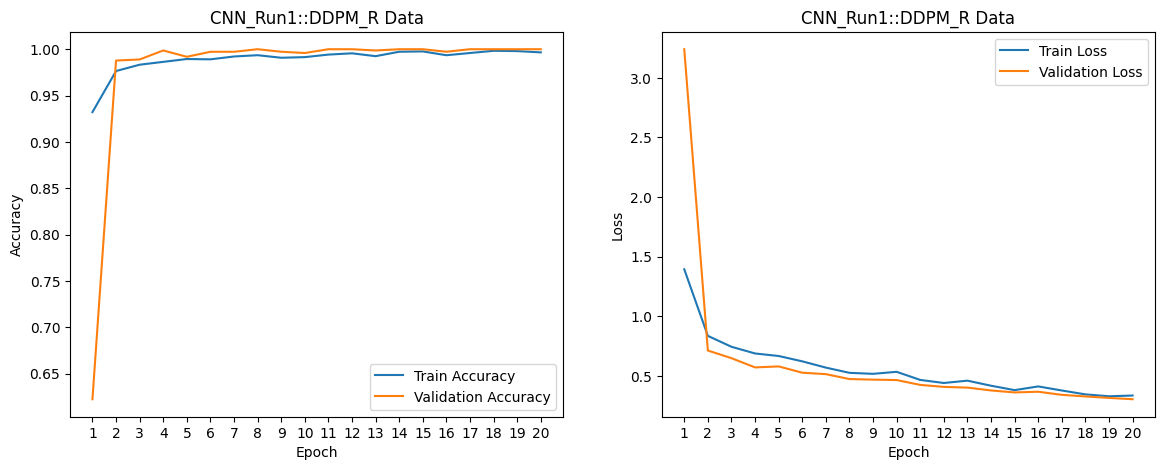

Confusion matrix, without normalization
[[230   1]
 [ 11  64]]
              precision    recall  f1-score   support

      NORMAL       0.95      1.00      0.97       231
   PNEUMONIA       0.98      0.85      0.91        75

    accuracy                           0.96       306
   macro avg       0.97      0.92      0.94       306
weighted avg       0.96      0.96      0.96       306

Confusion matrix, without normalization
[[227   2]
 [ 17  60]]
              precision    recall  f1-score   support

      NORMAL       0.93      0.99      0.96       229
   PNEUMONIA       0.97      0.78      0.86        77

    accuracy                           0.94       306
   macro avg       0.95      0.89      0.91       306
weighted avg       0.94      0.94      0.94       306

Confusion matrix, without normalization
[[229   2]
 [ 13  62]]
              precision    recall  f1-score   support

      NORMAL       0.95      0.99      0.97       231
   PNEUMONIA       0.97      0.83      0.89     

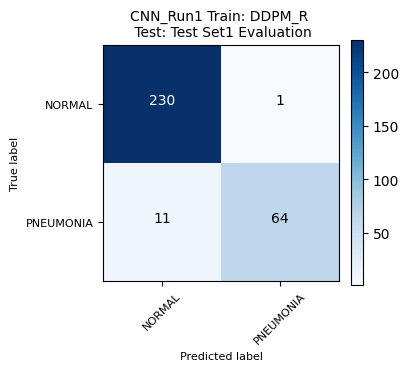

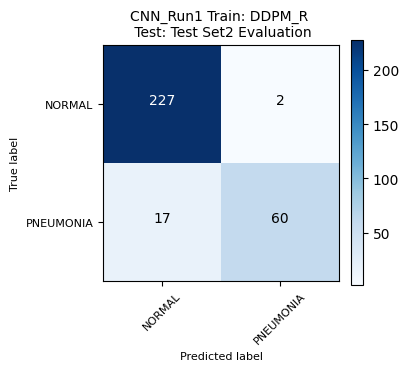

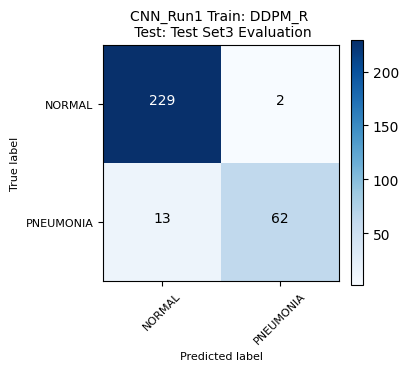

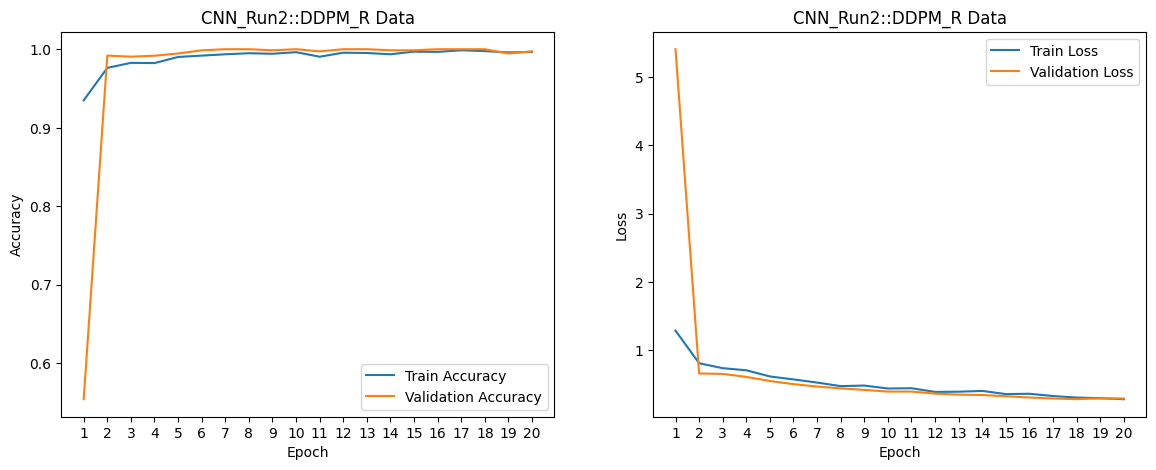

Confusion matrix, without normalization
[[224   6]
 [  7  69]]
              precision    recall  f1-score   support

      NORMAL       0.97      0.97      0.97       230
   PNEUMONIA       0.92      0.91      0.91        76

    accuracy                           0.96       306
   macro avg       0.94      0.94      0.94       306
weighted avg       0.96      0.96      0.96       306

Confusion matrix, without normalization
[[227   7]
 [  7  65]]
              precision    recall  f1-score   support

      NORMAL       0.97      0.97      0.97       234
   PNEUMONIA       0.90      0.90      0.90        72

    accuracy                           0.95       306
   macro avg       0.94      0.94      0.94       306
weighted avg       0.95      0.95      0.95       306

Confusion matrix, without normalization
[[225   5]
 [  7  69]]
              precision    recall  f1-score   support

      NORMAL       0.97      0.98      0.97       230
   PNEUMONIA       0.93      0.91      0.92     

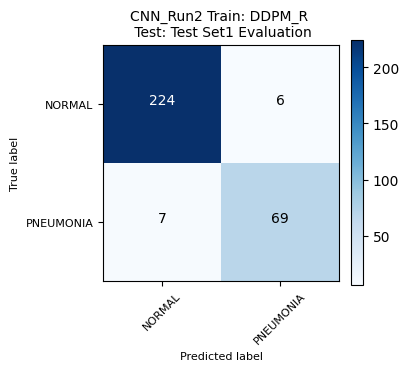

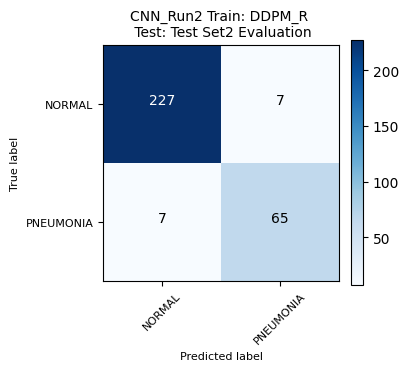

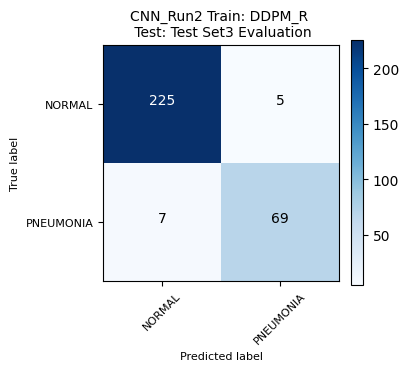

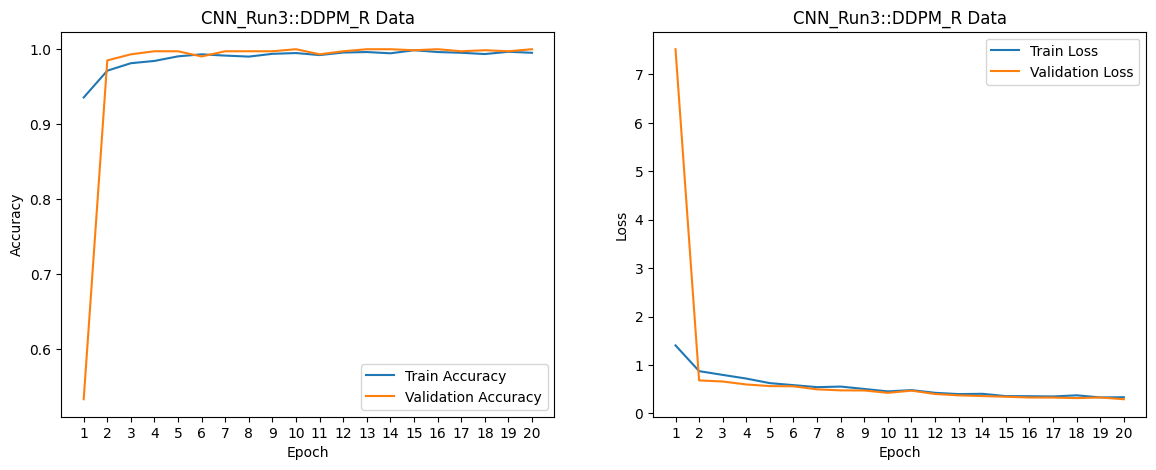

Confusion matrix, without normalization
[[241   0]
 [ 13  66]]
              precision    recall  f1-score   support

      NORMAL       0.95      1.00      0.97       241
   PNEUMONIA       1.00      0.84      0.91        79

    accuracy                           0.96       320
   macro avg       0.97      0.92      0.94       320
weighted avg       0.96      0.96      0.96       320

Confusion matrix, without normalization
[[229   2]
 [ 14  61]]
              precision    recall  f1-score   support

      NORMAL       0.94      0.99      0.97       231
   PNEUMONIA       0.97      0.81      0.88        75

    accuracy                           0.95       306
   macro avg       0.96      0.90      0.93       306
weighted avg       0.95      0.95      0.95       306

Confusion matrix, without normalization
[[232   1]
 [ 10  63]]
              precision    recall  f1-score   support

      NORMAL       0.96      1.00      0.98       233
   PNEUMONIA       0.98      0.86      0.92     

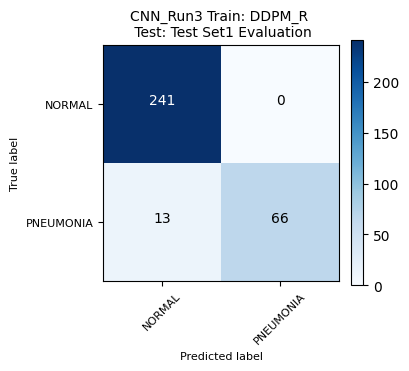

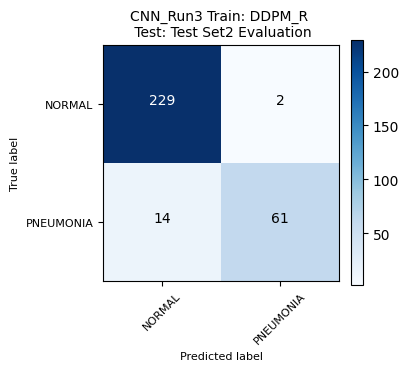

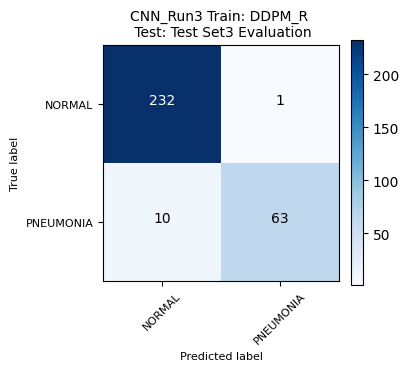

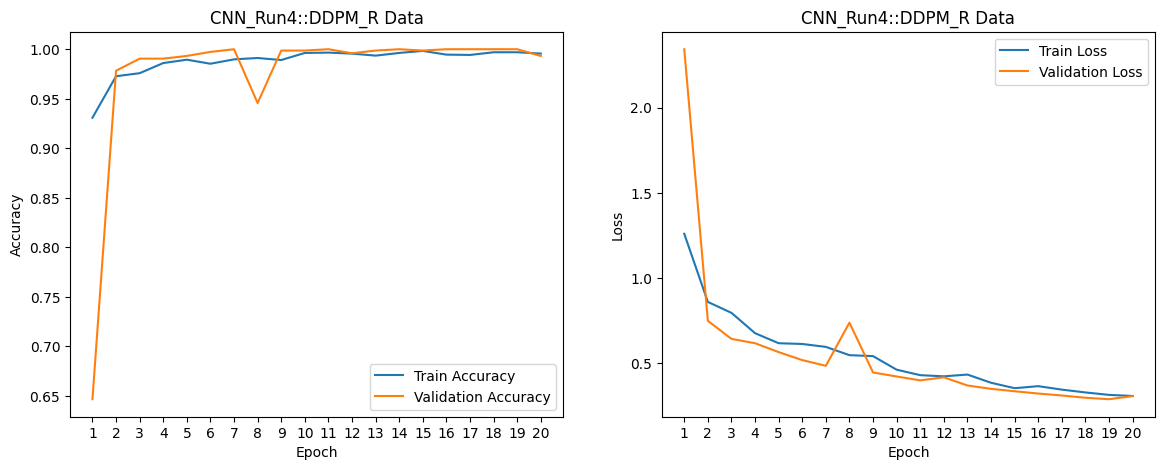

Confusion matrix, without normalization
[[220   7]
 [ 10  69]]
              precision    recall  f1-score   support

      NORMAL       0.96      0.97      0.96       227
   PNEUMONIA       0.91      0.87      0.89        79

    accuracy                           0.94       306
   macro avg       0.93      0.92      0.93       306
weighted avg       0.94      0.94      0.94       306

Confusion matrix, without normalization
[[223   6]
 [ 11  66]]
              precision    recall  f1-score   support

      NORMAL       0.95      0.97      0.96       229
   PNEUMONIA       0.92      0.86      0.89        77

    accuracy                           0.94       306
   macro avg       0.93      0.92      0.92       306
weighted avg       0.94      0.94      0.94       306

Confusion matrix, without normalization
[[223   8]
 [  9  66]]
              precision    recall  f1-score   support

      NORMAL       0.96      0.97      0.96       231
   PNEUMONIA       0.89      0.88      0.89     

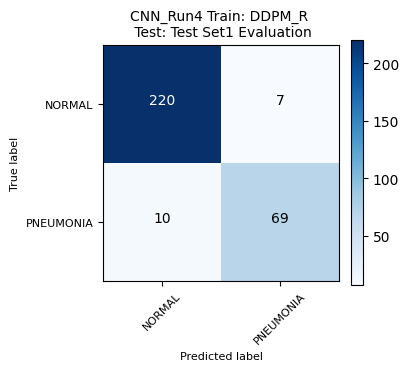

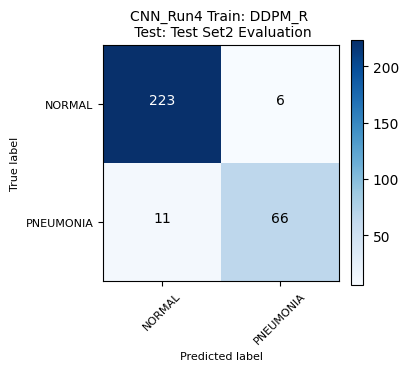

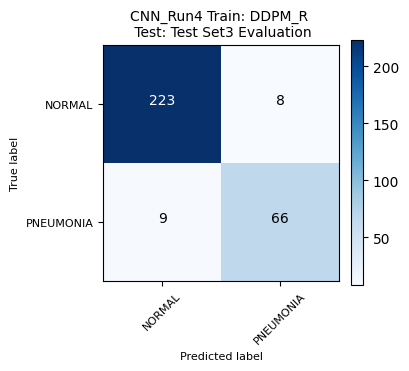

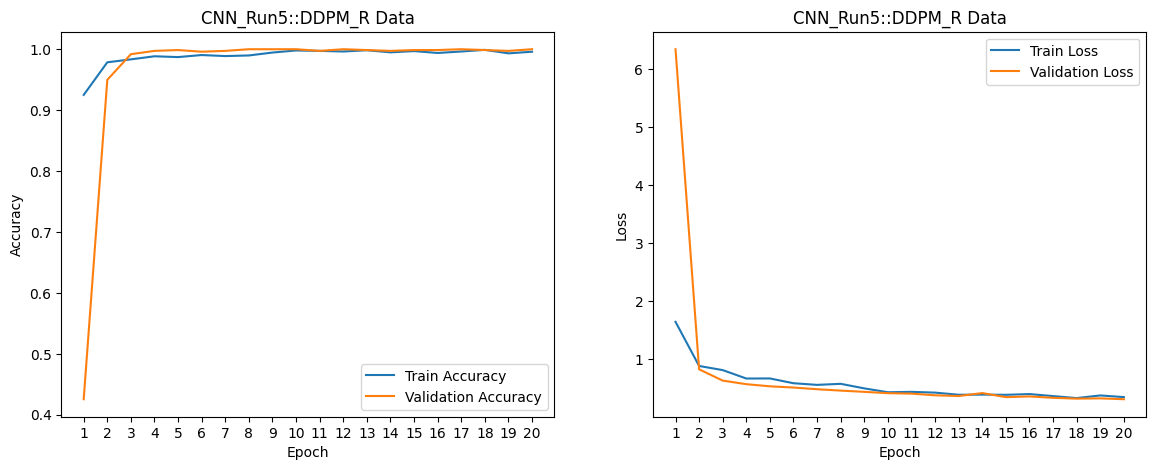

Confusion matrix, without normalization
[[225   2]
 [  6  73]]
              precision    recall  f1-score   support

      NORMAL       0.97      0.99      0.98       227
   PNEUMONIA       0.97      0.92      0.95        79

    accuracy                           0.97       306
   macro avg       0.97      0.96      0.97       306
weighted avg       0.97      0.97      0.97       306

Confusion matrix, without normalization
[[230   2]
 [  9  65]]
              precision    recall  f1-score   support

      NORMAL       0.96      0.99      0.98       232
   PNEUMONIA       0.97      0.88      0.92        74

    accuracy                           0.96       306
   macro avg       0.97      0.93      0.95       306
weighted avg       0.96      0.96      0.96       306

Confusion matrix, without normalization
[[228   2]
 [  6  70]]
              precision    recall  f1-score   support

      NORMAL       0.97      0.99      0.98       230
   PNEUMONIA       0.97      0.92      0.95     

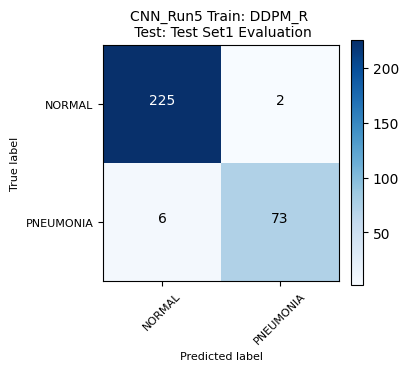

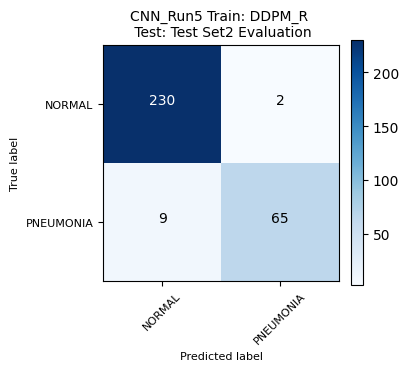

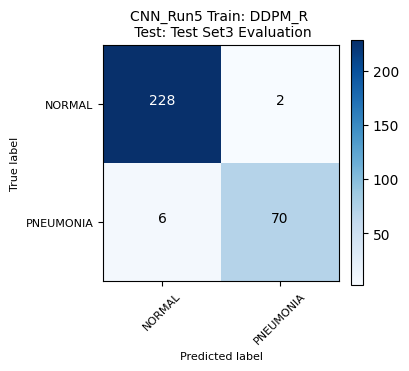

In [5]:
dataset_dir = dataset_dir_ddpm_rand
for i in range(0,n):
    # Load and preprocess datasets
    train_ds, val_ds = load_and_preprocess_data(dataset_dir, class_labels, img_size, batch_size)
    test_ds1_rand = load_and_preprocess_data(test_dataset_dir1_rand, class_labels, img_size, batch_size)[0]
    test_ds2_rand = load_and_preprocess_data(test_dataset_dir2_rand, class_labels, img_size, batch_size)[0]
    test_ds3_rand = load_and_preprocess_data(test_dataset_dir3_rand, class_labels, img_size, batch_size)[0]
    
    model = build_and_compile_model(input_shape=input_shape, num_classes=len(class_labels))
    history, trained_model = train_model(train_ds, val_ds, model, epochs=epochs, batch_size=batch_size)
    
    plot_training_history2(history, "DDPM_R Data", f"CNN_Run{i+1}", figsize=(14, 5))
    evaluate_model(trained_model, test_ds1_rand, class_labels, model_name=f"CNN_Run{i+1} Train: DDPM_R", title="Test Set1 Evaluation")
    evaluate_model(trained_model, test_ds2_rand, class_labels, model_name=f"CNN_Run{i+1} Train: DDPM_R", title="Test Set2 Evaluation")
    evaluate_model(trained_model, test_ds3_rand, class_labels, model_name=f"CNN_Run{i+1} Train: DDPM_R", title="Test Set3 Evaluation")

### Train: Original & PGGANs150k Data

2024-09-11 10:38:21.553668: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/20
92/92 [==============================] - 104s 1s/step - loss: 1.2440 - accuracy: 0.9400 - val_loss: 0.8660 - val_accuracy: 0.9484
Epoch 2/20
92/92 [==============================] - 101s 1s/step - loss: 0.8308 - accuracy: 0.9806 - val_loss: 0.6766 - val_accuracy: 0.9864
Epoch 3/20
92/92 [==============================] - 102s 1s/step - loss: 0.7364 - accuracy: 0.9840 - val_loss: 0.6197 - val_accuracy: 0.9945
Epoch 4/20
92/92 [==============================] - 101s 1s/step - loss: 0.6763 - accuracy: 0.9881 - val_loss: 0.7009 - val_accuracy: 0.9633
Epoch 5/20
92/92 [==============================] - 101s 1s/step - loss: 0.6299 - accuracy: 0.9922 - val_loss: 0.5895 - val_accuracy: 0.9918
Epoch 6/20
92/92 [==============================] - 102s 1s/step - loss: 0.5874 - accuracy: 0.9915 - val_loss: 0.5131 - val_accuracy: 0.9959
Epoch 7/20
92/92 [==============================] - 101s 1s/step - loss: 0.5165 - accuracy: 0.9945 - val_loss: 0.5004 - val_accuracy: 0.9959
Epoch 8/20
92

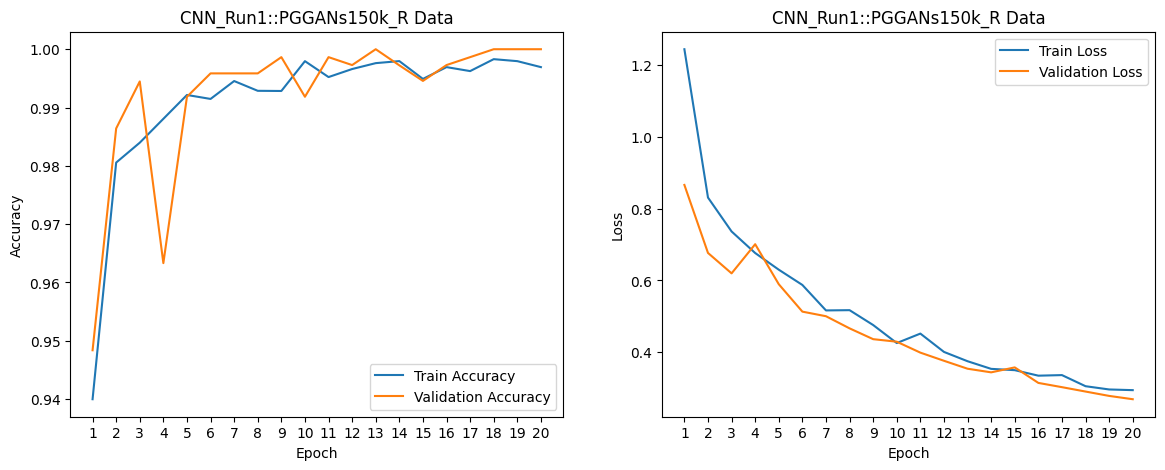

Confusion matrix, without normalization
[[223   8]
 [  4  71]]
              precision    recall  f1-score   support

      NORMAL       0.98      0.97      0.97       231
   PNEUMONIA       0.90      0.95      0.92        75

    accuracy                           0.96       306
   macro avg       0.94      0.96      0.95       306
weighted avg       0.96      0.96      0.96       306

Confusion matrix, without normalization
[[221   8]
 [  8  69]]
              precision    recall  f1-score   support

      NORMAL       0.97      0.97      0.97       229
   PNEUMONIA       0.90      0.90      0.90        77

    accuracy                           0.95       306
   macro avg       0.93      0.93      0.93       306
weighted avg       0.95      0.95      0.95       306

Confusion matrix, without normalization
[[225   6]
 [  4  71]]
              precision    recall  f1-score   support

      NORMAL       0.98      0.97      0.98       231
   PNEUMONIA       0.92      0.95      0.93     

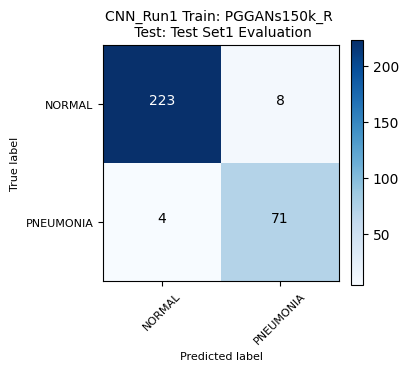

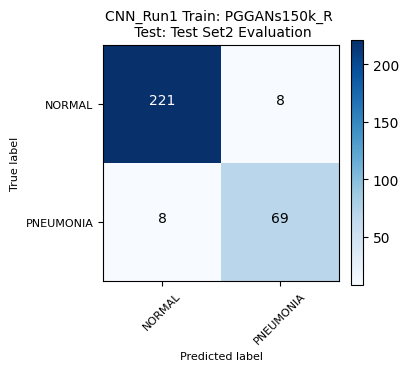

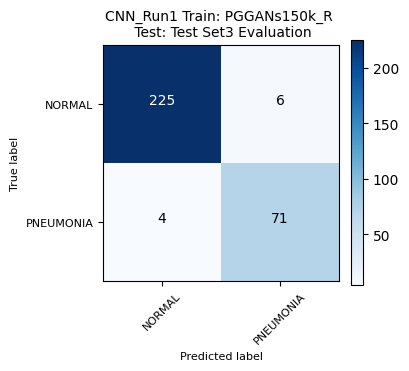

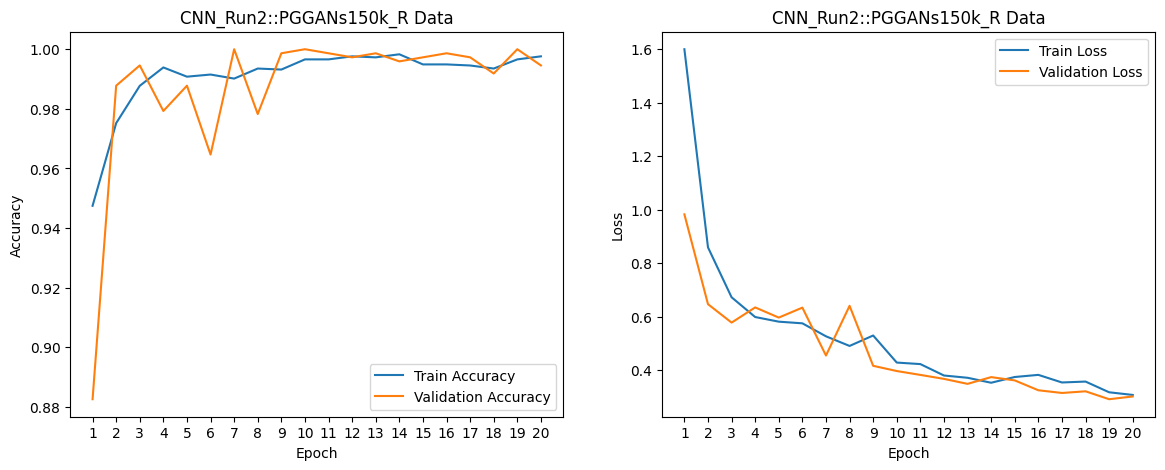

Confusion matrix, without normalization
[[227   3]
 [  6  70]]
              precision    recall  f1-score   support

      NORMAL       0.97      0.99      0.98       230
   PNEUMONIA       0.96      0.92      0.94        76

    accuracy                           0.97       306
   macro avg       0.97      0.95      0.96       306
weighted avg       0.97      0.97      0.97       306

Confusion matrix, without normalization
[[228   6]
 [  9  63]]
              precision    recall  f1-score   support

      NORMAL       0.96      0.97      0.97       234
   PNEUMONIA       0.91      0.88      0.89        72

    accuracy                           0.95       306
   macro avg       0.94      0.92      0.93       306
weighted avg       0.95      0.95      0.95       306

Confusion matrix, without normalization
[[225   5]
 [  8  68]]
              precision    recall  f1-score   support

      NORMAL       0.97      0.98      0.97       230
   PNEUMONIA       0.93      0.89      0.91     

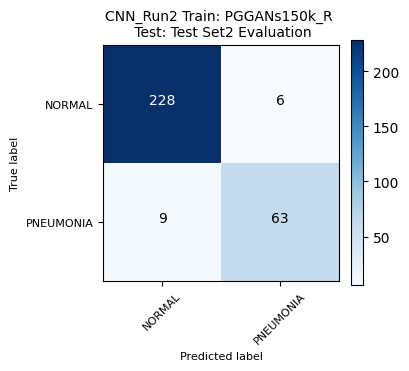

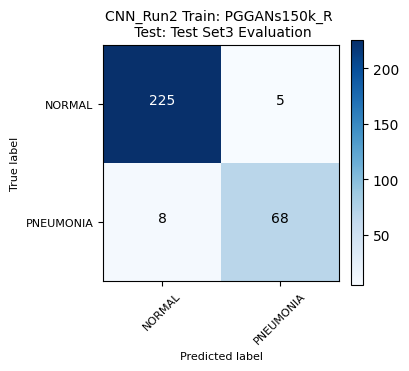

Confusion matrix, without normalization
[[239   2]
 [ 13  66]]
              precision    recall  f1-score   support

      NORMAL       0.95      0.99      0.97       241
   PNEUMONIA       0.97      0.84      0.90        79

    accuracy                           0.95       320
   macro avg       0.96      0.91      0.93       320
weighted avg       0.95      0.95      0.95       320

Confusion matrix, without normalization
[[227   4]
 [ 17  58]]
              precision    recall  f1-score   support

      NORMAL       0.93      0.98      0.96       231
   PNEUMONIA       0.94      0.77      0.85        75

    accuracy                           0.93       306
   macro avg       0.93      0.88      0.90       306
weighted avg       0.93      0.93      0.93       306

Confusion matrix, without normalization
[[230   3]
 [ 19  54]]
              precision    recall  f1-score   support

      NORMAL       0.92      0.99      0.95       233
   PNEUMONIA       0.95      0.74      0.83     

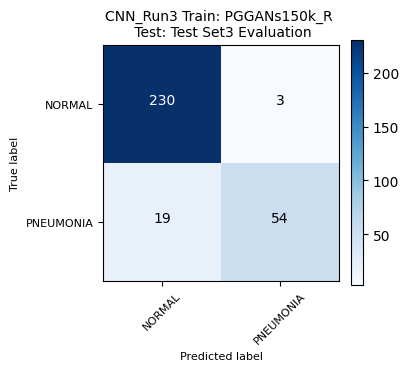

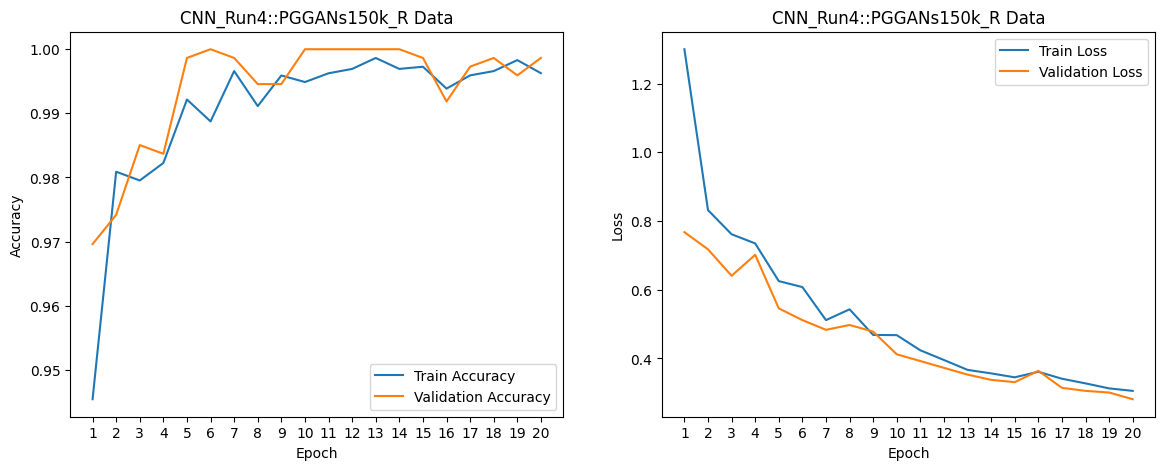

Confusion matrix, without normalization
[[219   8]
 [  6  73]]
              precision    recall  f1-score   support

      NORMAL       0.97      0.96      0.97       227
   PNEUMONIA       0.90      0.92      0.91        79

    accuracy                           0.95       306
   macro avg       0.94      0.94      0.94       306
weighted avg       0.95      0.95      0.95       306

Confusion matrix, without normalization
[[225   4]
 [  7  70]]
              precision    recall  f1-score   support

      NORMAL       0.97      0.98      0.98       229
   PNEUMONIA       0.95      0.91      0.93        77

    accuracy                           0.96       306
   macro avg       0.96      0.95      0.95       306
weighted avg       0.96      0.96      0.96       306

Confusion matrix, without normalization
[[224   7]
 [  6  69]]
              precision    recall  f1-score   support

      NORMAL       0.97      0.97      0.97       231
   PNEUMONIA       0.91      0.92      0.91     

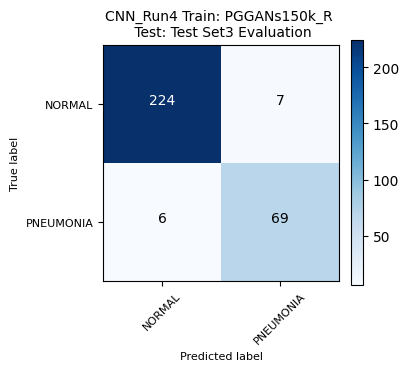

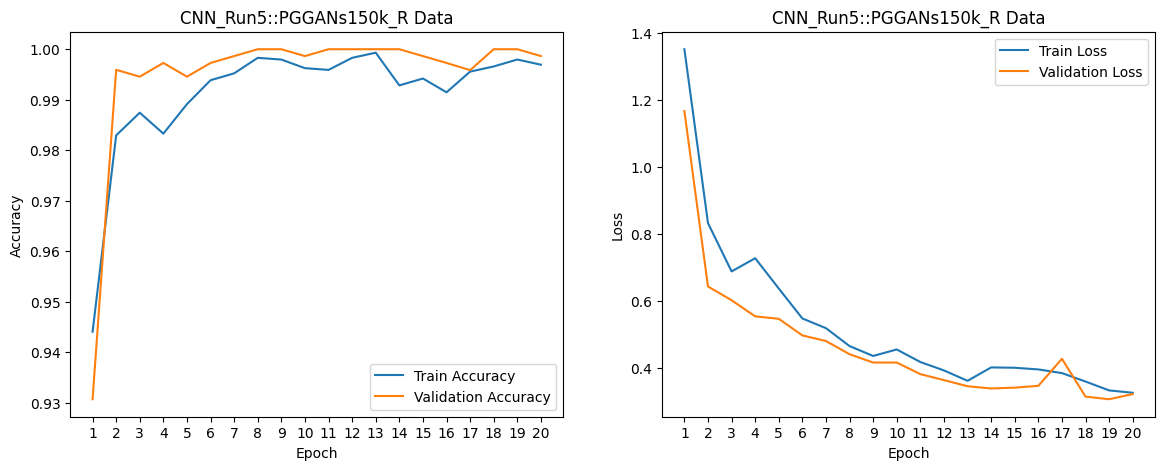

Confusion matrix, without normalization
[[223   4]
 [  8  71]]
              precision    recall  f1-score   support

      NORMAL       0.97      0.98      0.97       227
   PNEUMONIA       0.95      0.90      0.92        79

    accuracy                           0.96       306
   macro avg       0.96      0.94      0.95       306
weighted avg       0.96      0.96      0.96       306

Confusion matrix, without normalization
[[229   3]
 [ 13  61]]
              precision    recall  f1-score   support

      NORMAL       0.95      0.99      0.97       232
   PNEUMONIA       0.95      0.82      0.88        74

    accuracy                           0.95       306
   macro avg       0.95      0.91      0.93       306
weighted avg       0.95      0.95      0.95       306

Confusion matrix, without normalization
[[228   2]
 [ 10  66]]
              precision    recall  f1-score   support

      NORMAL       0.96      0.99      0.97       230
   PNEUMONIA       0.97      0.87      0.92     

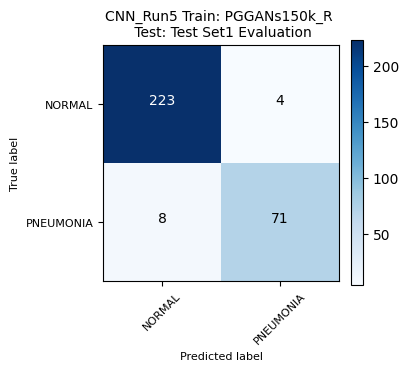

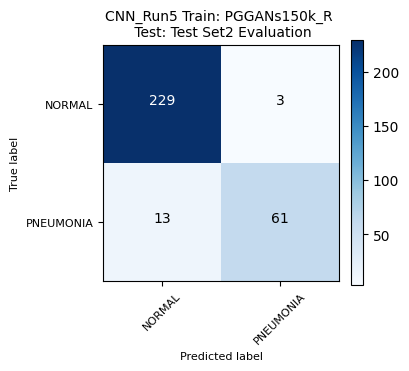

In [6]:
dataset_dir = dataset_dir_pggans150_rand
for i in range(0,n):
    # Load and preprocess datasets
    train_ds, val_ds = load_and_preprocess_data(dataset_dir, class_labels, img_size, batch_size)
    test_ds1_rand = load_and_preprocess_data(test_dataset_dir1_rand, class_labels, img_size, batch_size)[0]
    test_ds2_rand = load_and_preprocess_data(test_dataset_dir2_rand, class_labels, img_size, batch_size)[0]
    test_ds3_rand = load_and_preprocess_data(test_dataset_dir3_rand, class_labels, img_size, batch_size)[0]
    
    model = build_and_compile_model(input_shape=input_shape, num_classes=len(class_labels))
    history, trained_model = train_model(train_ds, val_ds, model, epochs=epochs, batch_size=batch_size)
    
    plot_training_history2(history, "PGGANs150k_R Data", f"CNN_Run{i+1}", figsize=(14, 5))
    evaluate_model(trained_model, test_ds1_rand, class_labels, model_name=f"CNN_Run{i+1} Train: PGGANs150k_R", title="Test Set1 Evaluation")
    evaluate_model(trained_model, test_ds2_rand, class_labels, model_name=f"CNN_Run{i+1} Train: PGGANs150k_R", title="Test Set2 Evaluation")
    evaluate_model(trained_model, test_ds3_rand, class_labels, model_name=f"CNN_Run{i+1} Train: PGGANs150k_R", title="Test Set3 Evaluation")

### Train: Original & PGGANs160k Data

2024-09-11 21:37:43.565705: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/20
92/92 [==============================] - 104s 1s/step - loss: 1.3029 - accuracy: 0.9256 - val_loss: 0.9407 - val_accuracy: 0.9062
Epoch 2/20
92/92 [==============================] - 102s 1s/step - loss: 0.7613 - accuracy: 0.9758 - val_loss: 0.6878 - val_accuracy: 0.9878
Epoch 3/20
92/92 [==============================] - 101s 1s/step - loss: 0.7056 - accuracy: 0.9806 - val_loss: 0.6288 - val_accuracy: 0.9820
Epoch 4/20
92/92 [==============================] - 102s 1s/step - loss: 0.6437 - accuracy: 0.9850 - val_loss: 0.5634 - val_accuracy: 0.9986
Epoch 5/20
92/92 [==============================] - 101s 1s/step - loss: 0.5738 - accuracy: 0.9928 - val_loss: 0.5501 - val_accuracy: 0.9946
Epoch 6/20
92/92 [==============================] - 101s 1s/step - loss: 0.5386 - accuracy: 0.9956 - val_loss: 0.5042 - val_accuracy: 0.9972
Epoch 7/20
92/92 [==============================] - 101s 1s/step - loss: 0.5209 - accuracy: 0.9928 - val_loss: 0.5042 - val_accuracy: 0.9917
Epoch 8/20
92

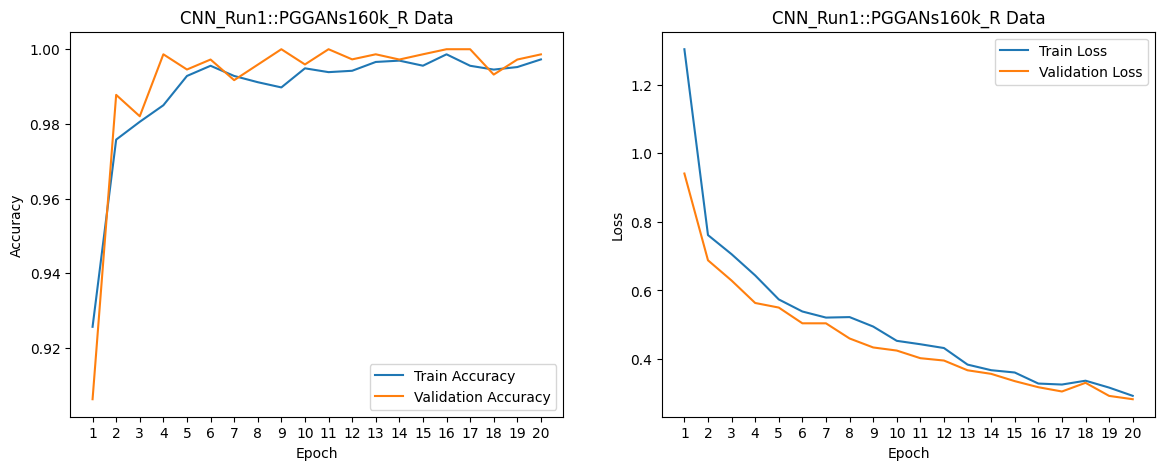

Confusion matrix, without normalization
[[229   2]
 [  6  69]]
              precision    recall  f1-score   support

      NORMAL       0.97      0.99      0.98       231
   PNEUMONIA       0.97      0.92      0.95        75

    accuracy                           0.97       306
   macro avg       0.97      0.96      0.96       306
weighted avg       0.97      0.97      0.97       306

Confusion matrix, without normalization
[[226   3]
 [  9  68]]
              precision    recall  f1-score   support

      NORMAL       0.96      0.99      0.97       229
   PNEUMONIA       0.96      0.88      0.92        77

    accuracy                           0.96       306
   macro avg       0.96      0.94      0.95       306
weighted avg       0.96      0.96      0.96       306

Confusion matrix, without normalization
[[227   4]
 [  8  67]]
              precision    recall  f1-score   support

      NORMAL       0.97      0.98      0.97       231
   PNEUMONIA       0.94      0.89      0.92     

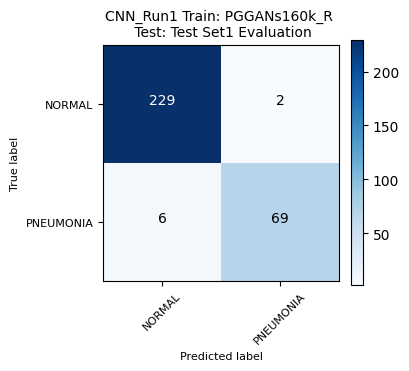

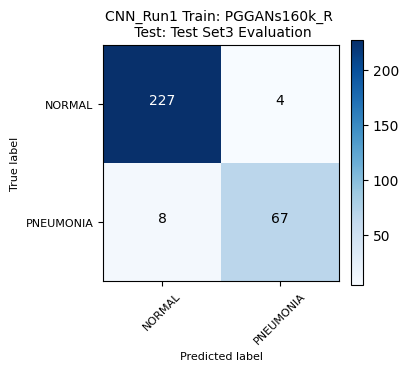

Confusion matrix, without normalization
[[228   2]
 [  7  69]]
              precision    recall  f1-score   support

      NORMAL       0.97      0.99      0.98       230
   PNEUMONIA       0.97      0.91      0.94        76

    accuracy                           0.97       306
   macro avg       0.97      0.95      0.96       306
weighted avg       0.97      0.97      0.97       306

Confusion matrix, without normalization
[[230   4]
 [ 10  62]]
              precision    recall  f1-score   support

      NORMAL       0.96      0.98      0.97       234
   PNEUMONIA       0.94      0.86      0.90        72

    accuracy                           0.95       306
   macro avg       0.95      0.92      0.93       306
weighted avg       0.95      0.95      0.95       306

Confusion matrix, without normalization
[[226   4]
 [  7  69]]
              precision    recall  f1-score   support

      NORMAL       0.97      0.98      0.98       230
   PNEUMONIA       0.95      0.91      0.93     

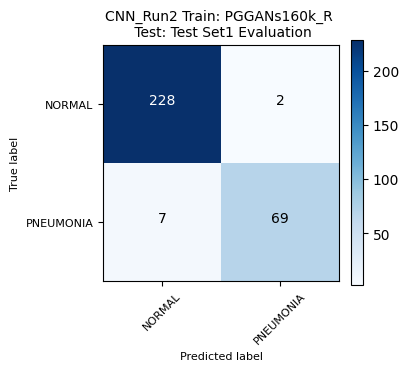

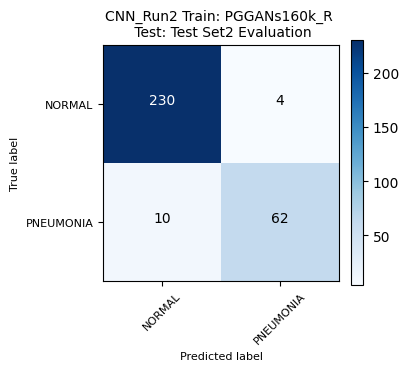

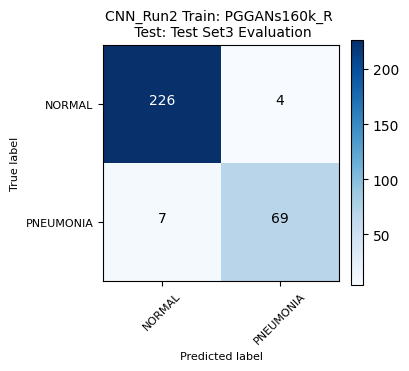

Confusion matrix, without normalization
[[238   3]
 [  9  70]]
              precision    recall  f1-score   support

      NORMAL       0.96      0.99      0.98       241
   PNEUMONIA       0.96      0.89      0.92        79

    accuracy                           0.96       320
   macro avg       0.96      0.94      0.95       320
weighted avg       0.96      0.96      0.96       320

Confusion matrix, without normalization
[[225   6]
 [  9  66]]
              precision    recall  f1-score   support

      NORMAL       0.96      0.97      0.97       231
   PNEUMONIA       0.92      0.88      0.90        75

    accuracy                           0.95       306
   macro avg       0.94      0.93      0.93       306
weighted avg       0.95      0.95      0.95       306

Confusion matrix, without normalization
[[229   4]
 [  7  66]]
              precision    recall  f1-score   support

      NORMAL       0.97      0.98      0.98       233
   PNEUMONIA       0.94      0.90      0.92     

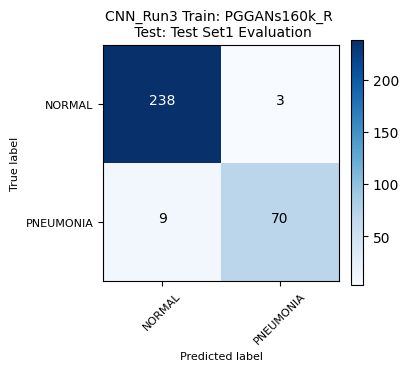

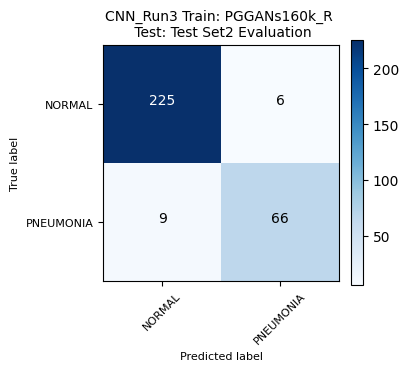

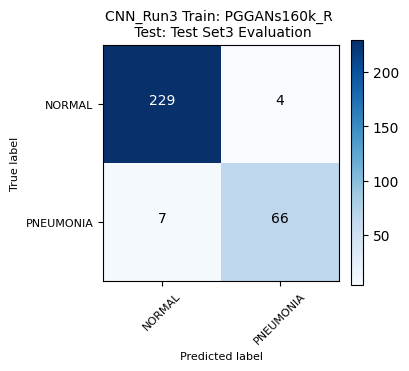

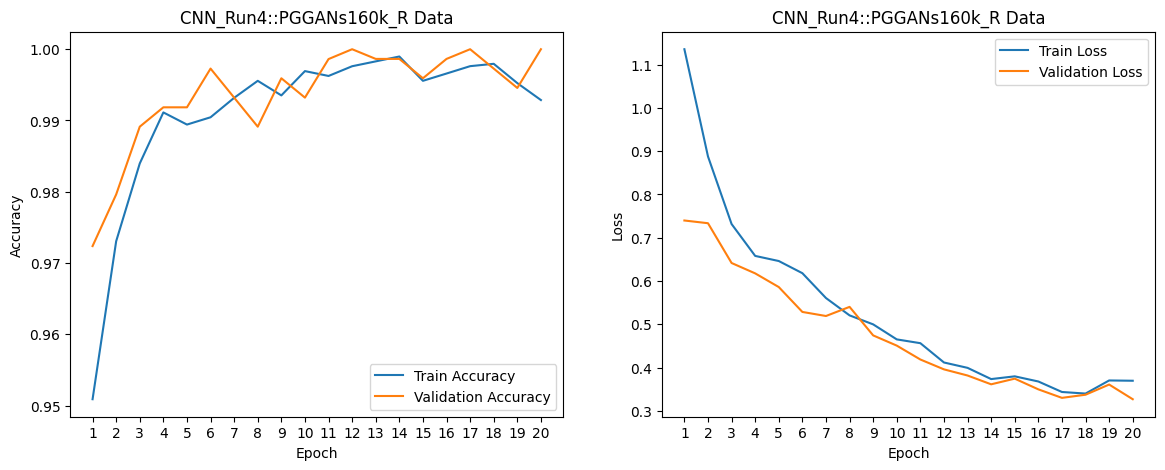

Confusion matrix, without normalization
[[225   2]
 [ 12  67]]
              precision    recall  f1-score   support

      NORMAL       0.95      0.99      0.97       227
   PNEUMONIA       0.97      0.85      0.91        79

    accuracy                           0.95       306
   macro avg       0.96      0.92      0.94       306
weighted avg       0.95      0.95      0.95       306

Confusion matrix, without normalization
[[228   1]
 [ 15  62]]
              precision    recall  f1-score   support

      NORMAL       0.94      1.00      0.97       229
   PNEUMONIA       0.98      0.81      0.89        77

    accuracy                           0.95       306
   macro avg       0.96      0.90      0.93       306
weighted avg       0.95      0.95      0.95       306

Confusion matrix, without normalization
[[230   1]
 [  9  66]]
              precision    recall  f1-score   support

      NORMAL       0.96      1.00      0.98       231
   PNEUMONIA       0.99      0.88      0.93     

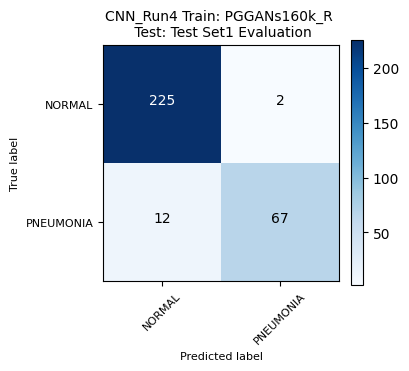

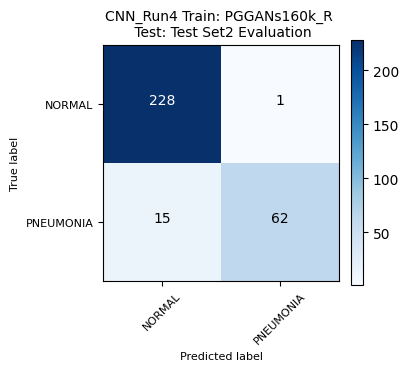

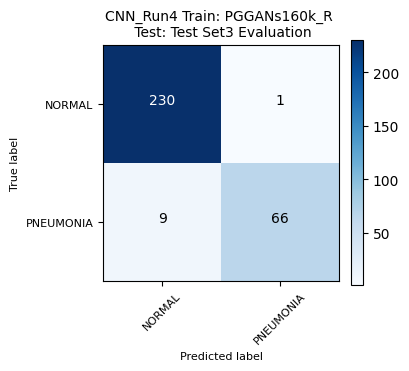

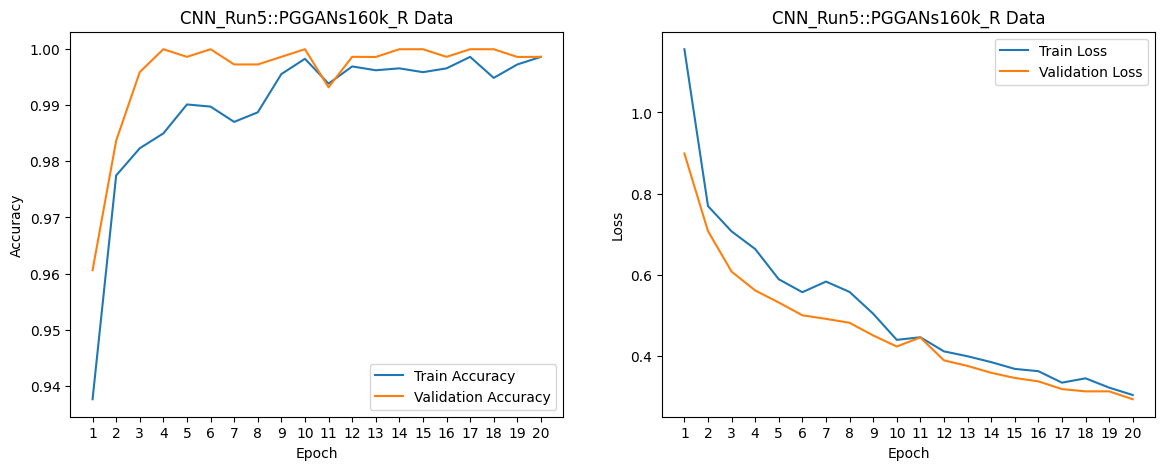

Confusion matrix, without normalization
[[226   1]
 [ 24  55]]
              precision    recall  f1-score   support

      NORMAL       0.90      1.00      0.95       227
   PNEUMONIA       0.98      0.70      0.81        79

    accuracy                           0.92       306
   macro avg       0.94      0.85      0.88       306
weighted avg       0.92      0.92      0.91       306

Confusion matrix, without normalization
[[232   0]
 [ 25  49]]
              precision    recall  f1-score   support

      NORMAL       0.90      1.00      0.95       232
   PNEUMONIA       1.00      0.66      0.80        74

    accuracy                           0.92       306
   macro avg       0.95      0.83      0.87       306
weighted avg       0.93      0.92      0.91       306

Confusion matrix, without normalization
[[230   0]
 [ 26  50]]
              precision    recall  f1-score   support

      NORMAL       0.90      1.00      0.95       230
   PNEUMONIA       1.00      0.66      0.79     

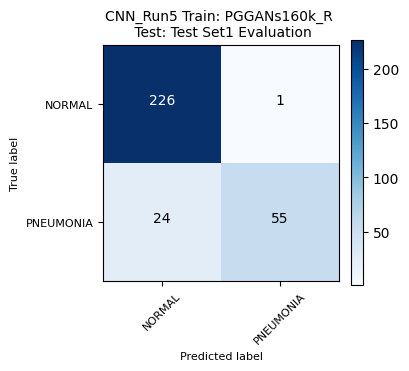

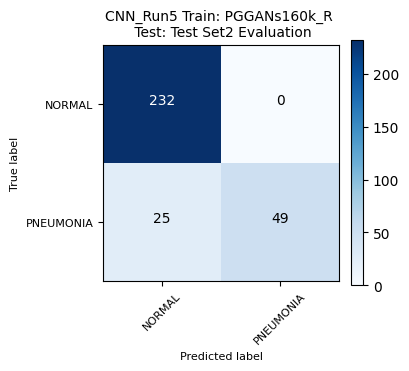

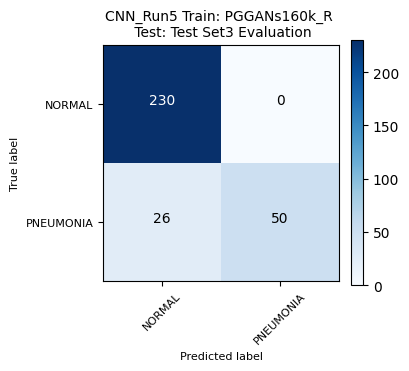

In [6]:
dataset_dir = dataset_dir_pggans160_rand
for i in range(0,n):
    # Load and preprocess datasets
    train_ds, val_ds = load_and_preprocess_data(dataset_dir, class_labels, img_size, batch_size)
    test_ds1_rand = load_and_preprocess_data(test_dataset_dir1_rand, class_labels, img_size, batch_size)[0]
    test_ds2_rand = load_and_preprocess_data(test_dataset_dir2_rand, class_labels, img_size, batch_size)[0]
    test_ds3_rand = load_and_preprocess_data(test_dataset_dir3_rand, class_labels, img_size, batch_size)[0]
    
    model = build_and_compile_model(input_shape=input_shape, num_classes=len(class_labels))
    history, trained_model = train_model(train_ds, val_ds, model, epochs=epochs, batch_size=batch_size)
    
    plot_training_history2(history, "PGGANs160k_R Data", f"CNN_Run{i+1}", figsize=(14, 5))
    evaluate_model(trained_model, test_ds1_rand, class_labels, model_name=f"CNN_Run{i+1} Train: PGGANs160k_R", title="Test Set1 Evaluation")
    evaluate_model(trained_model, test_ds2_rand, class_labels, model_name=f"CNN_Run{i+1} Train: PGGANs160k_R", title="Test Set2 Evaluation")
    evaluate_model(trained_model, test_ds3_rand, class_labels, model_name=f"CNN_Run{i+1} Train: PGGANs160k_R", title="Test Set3 Evaluation")